In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True


results = []
num_classes = 2

learning_rate = 0.001
samples = 3000

for epsilon in [0.2]:
    for batch_size in [256]:
        for hidden_size in [100]:
            for EPS1 in [0.005]:
                for n in [100000]:#10000, 50000, 100000]:
                    for aux_loss_activated in [True]:
                        for opt in [2]:
                            for t in range(15):
                                train_dataset, test_dataset = ut.load_files(dataset=1)
                                input_size = train_dataset.shape[1]-1                                
                                if n < 50000:
                                    train_dataset = ut.down_sampling(train_dataset)
                                    train_dataset = train_dataset.sample(n)
                                    print(train_dataset)
                                else: 
                                    trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                    print('shape: ', trainig_dataset_a.shape[0])
                                    n2 = n - trainig_dataset_a.shape[0]
                                    print('clase no RR Lrae', n2)
                                    trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                    train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                                
                                train_dataset, _ = ut.delete_outliers(train_dataset, test_dataset)

                                train_dataset = ut.sort_columns(train_dataset)
                                test_dataset = ut.sort_columns(test_dataset)
                                #... normalize ...
                                train_dataset, test_dataset = ut.normalize(train_dataset, test_dataset)
                                #print(train_dataset.columns)
                                test_dataset_pred = test_dataset.copy()
                                train_dataset_pred = train_dataset.copy()
                                try:
                                    data_prior = ut.generate_samples(samples, train_dataset, epsilon,  option = opt,  DRs={'feature':'Amplitude', 'up': 0.45, 'lp': 0.1})

                                    train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2, random_state=42)

                                    train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2, random_state=42)
                                    print(train_dataset_prior.columns)


                                    _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                    _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                    _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                    _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                    _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                    net = Net(input_size, hidden_size, hidden_size, num_classes)
                                    net.cuda()

                                    hist_val, hist_train = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                    EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)

                                    acc_train, recall_train, f1_train = nn.get_results(net, train_loader, input_size)
                                    acc_test, recall_test, f1_test  = nn.get_results(net, test_loader, input_size)
                                    nn.get_roc_curve(net, test_loader, input_size, name= str(t)+"_"+str(acc_test), title="Regularization")
                                except Exception as error:
                                    print(error) 
                                    print(str(epsilon)+"-"+str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))
                                    

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/franciscoperez/anacon

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78033, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  92.05155819654465 -- aux loss:  14.096801996231079
training: epoch:  2  loss:  80.06857153773308 -- aux loss:  13.569068670272827
training: epoch:  3  loss:  79.42698219418526 -- aux loss:  12.903446316719055
training: epoch:  4  loss:  79.18977189064026 -- aux loss:  12.424912571907043
training: epoch:  5  loss:  79.04741230607033 -- aux loss:  12.1052747964859
training: epoch:  6  loss:  78.93352502584457 -- aux loss:  11.801228821277618
training: epoch:  7  loss:  78.77254554629326 -- aux loss:  11.535120904445648
training: epoch:  8  loss:  78.62045979499817 -- aux loss:  10.873896479606628
training: epoch:  9  loss:  78.51345697045326 -- aux loss:  10.208155870437622
training: epoch:  10  loss:  78.42809534072876 -- aux loss:  9.637029141187668
the_last_loss:  0.0
running_loss_val:  0.4959162771701813
validating: epoch:  10  loss:  0.4959162771701813
The current loss: 0.4959162771701813
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5778, d

training: epoch:  67  loss:  77.11906278133392 -- aux loss:  5.958950608968735
training: epoch:  68  loss:  77.11014983057976 -- aux loss:  5.9586566388607025
training: epoch:  69  loss:  77.10245296359062 -- aux loss:  5.9583547711372375
training: epoch:  70  loss:  77.09197479486465 -- aux loss:  5.9581318795681
the_last_loss:  0.31358206272125244
running_loss_val:  0.3133828043937683
validating: epoch:  70  loss:  0.3133828043937683
The current loss: 0.3133828043937683
the_last_loss: 0.31358206272125244
trigger times: 0
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9476, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(524, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  71  loss:  77.08426484465599 -- aux loss:  5.957892298698425
training: epoch:  72  loss:  77.07561257481575 -- aux loss:  5.957689702510834
training: epoch:  7

training: epoch:  131  loss:  76.91187265515327 -- aux loss:  5.955898821353912
training: epoch:  132  loss:  76.90118643641472 -- aux loss:  5.955896973609924
training: epoch:  133  loss:  76.8930931687355 -- aux loss:  5.95589616894722
training: epoch:  134  loss:  76.89543208479881 -- aux loss:  5.955895215272903
training: epoch:  135  loss:  76.89176213741302 -- aux loss:  5.955893695354462
training: epoch:  136  loss:  76.8873308300972 -- aux loss:  5.955891251564026
training: epoch:  137  loss:  76.88805177807808 -- aux loss:  5.955890357494354
training: epoch:  138  loss:  76.88429629802704 -- aux loss:  5.955889880657196
training: epoch:  139  loss:  76.88338240981102 -- aux loss:  5.955888777971268
training: epoch:  140  loss:  76.9133948981762 -- aux loss:  5.955888241529465
the_last_loss:  0.31326282024383545
running_loss_val:  0.3132622539997101
validating: epoch:  140  loss:  0.3132622539997101
The current loss: 0.3132622539997101
the_last_loss: 0.31326282024383545
trigger

training: epoch:  196  loss:  76.82838529348373 -- aux loss:  5.955878257751465
training: epoch:  197  loss:  76.82827562093735 -- aux loss:  5.955878257751465
training: epoch:  198  loss:  76.8281761109829 -- aux loss:  5.955878257751465
training: epoch:  199  loss:  76.82798540592194 -- aux loss:  5.955878257751465
training: epoch:  200  loss:  76.82786804437637 -- aux loss:  5.955878257751465
the_last_loss:  0.3132616877555847
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.3132616877555847
trigger times: 0
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9476, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(524, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  201  loss:  76.82777440547943 -- aux loss:  5.9558782279491425
training: e

training: epoch:  261  loss:  76.81913298368454 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  76.81911051273346 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  76.81909140944481 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  76.81907624006271 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  76.81904971599579 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  76.81903228163719 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  76.81903719902039 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  76.87148758769035 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  76.87037485837936 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  76.87765389680862 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  326  loss:  76.80708119273186 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  76.80707630515099 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  76.80706888437271 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  76.80706137418747 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  76.80706530809402 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9476, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(524, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  331  loss:  76.84514057636261 -- aux loss:  5.955877214670181
training:

training: epoch:  391  loss:  76.8381794989109 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  76.81016585230827 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  76.80736377835274 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  76.8072347342968 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  76.80718547105789 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  76.8071523308754 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  76.80712777376175 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  76.80710846185684 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  76.80709335207939 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  76.80708047747612 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  456  loss:  76.80317258834839 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  76.80316412448883 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  76.80315789580345 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  76.80314952135086 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  76.80314293503761 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9476, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(524, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  461  loss:  76.80313670635223 -- aux loss:  5.955877214670181
training:

training: epoch:  521  loss:  76.80309143662453 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  76.8030876815319 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  76.80308359861374 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  76.80308011174202 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  76.80307686328888 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  76.80307397246361 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  76.80307132005692 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  76.8030678331852 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  76.80306535959244 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  76.80306306481361 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  586  loss:  76.79914447665215 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  76.79914325475693 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  76.79914206266403 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  76.79914063215256 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  76.79913967847824 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9476, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(524, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  591  loss:  76.79913836717606 -- aux loss:  5.955877214670181
training:

training: epoch:  651  loss:  76.79912039637566 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  76.79912036657333 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  76.79912036657333 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  76.79912024736404 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  76.79912024736404 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  76.79912021756172 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  76.79912015795708 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  76.79912003874779 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  76.79912006855011 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  76.79912000894547 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  716  loss:  76.7991192638874 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  76.79911929368973 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  76.7991192638874 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  76.79911923408508 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  76.7991192638874 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9476, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(524, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  721  loss:  76.79911929368973 -- aux loss:  5.955877214670181
training: ep

training: epoch:  781  loss:  76.7991191148758 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  76.7991191148758 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  76.7991191148758 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  76.7991191148758 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  76.7991191148758 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  76.7991191148758 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  76.7991191148758 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  76.7991191148758 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  76.7991191148758 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  76.7991191148758 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger ti

training: epoch:  846  loss:  76.79911905527115 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  76.79911905527115 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  76.79911902546883 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  76.7991189956665 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  76.7991189956665 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9476, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(524, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  851  loss:  76.79911902546883 -- aux loss:  5.955877214670181
training: e

training: epoch:  911  loss:  76.79911902546883 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  76.79911902546883 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  76.79911896586418 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  76.79911896586418 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  76.7991189956665 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  76.7991189956665 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  76.79911896586418 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  76.79911896586418 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  76.79911896586418 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  76.7991189956665 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  976  loss:  76.79911896586418 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  76.79911893606186 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  76.79911893606186 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  76.79911893606186 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  76.79911893606186 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9476, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(524, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  981  loss:  76.7991189956665 -- aux loss:  5.955877214670181
training: 

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78091, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  93.27260905504227 -- aux loss:  14.890505075454712
training: epoch:  2  loss:  80.69611990451813 -- aux loss:  14.66093224287033
training: epoch:  3  loss:  79.99918955564499 -- aux loss:  14.171506762504578
training: epoch:  4  loss:  79.74587261676788 -- aux loss:  13.732308328151703
training: epoch:  5  loss:  79.60082292556763 -- aux loss:  13.319701254367828
training: epoch:  6  loss:  79.49000519514084 -- aux loss:  12.918984830379486
training: epoch:  7  loss:  79.39337745308876 -- aux loss:  12.514549493789673
training: epoch:  8  loss:  79.27122583985329 -- aux loss:  12.236953020095825
training: epoch:  9  loss:  79.10725277662277 -- aux loss:  11.687670350074768
training: epoch:  10  loss:  78.94955262541771 -- aux loss:  10.970634162425995
the_last_loss:  0.0
running_loss_val:  0.557904839515686
validating: epoch:  10  loss:  0.557904839515686
The current loss: 0.557904839515686
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5766, de

training: epoch:  67  loss:  77.44766789674759 -- aux loss:  5.96338027715683
training: epoch:  68  loss:  77.43923541903496 -- aux loss:  5.962128102779388
training: epoch:  69  loss:  77.43209671974182 -- aux loss:  5.961368501186371
training: epoch:  70  loss:  77.42430528998375 -- aux loss:  5.960797190666199
the_last_loss:  0.3139914274215698
running_loss_val:  0.31351253390312195
validating: epoch:  70  loss:  0.31351253390312195
The current loss: 0.31351253390312195
the_last_loss: 0.3139914274215698
trigger times: 0
sum mask2 - L1:  tensor(5766, device='cuda:0')
sum mask2 - L2:  tensor(9486, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(234, device='cuda:0')
sum mask1 - L2 (aux):  tensor(514, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
training: epoch:  71  loss:  77.4175414443016 -- aux loss:  5.960464507341385
training: epoch:  72  loss:  77.40946435928345 -- aux loss:  5.960051953792572
training: epoch:  7

training: epoch:  131  loss:  77.21494644880295 -- aux loss:  5.955898076295853
training: epoch:  132  loss:  77.21228304505348 -- aux loss:  5.955896735191345
training: epoch:  133  loss:  77.2103999555111 -- aux loss:  5.955895125865936
training: epoch:  134  loss:  77.2078286409378 -- aux loss:  5.955893695354462
training: epoch:  135  loss:  77.20668357610703 -- aux loss:  5.955891817808151
training: epoch:  136  loss:  77.20595815777779 -- aux loss:  5.955891162157059
training: epoch:  137  loss:  77.20532223582268 -- aux loss:  5.955889254808426
training: epoch:  138  loss:  77.2040365934372 -- aux loss:  5.955888360738754
training: epoch:  139  loss:  77.20338356494904 -- aux loss:  5.955888241529465
training: epoch:  140  loss:  77.31129601597786 -- aux loss:  5.955885946750641
the_last_loss:  0.3132627010345459
running_loss_val:  0.31326213479042053
validating: epoch:  140  loss:  0.31326213479042053
The current loss: 0.31326213479042053
the_last_loss: 0.3132627010345459
trigg

training: epoch:  196  loss:  77.16609182953835 -- aux loss:  5.95587956905365
training: epoch:  197  loss:  77.21875098347664 -- aux loss:  5.955878853797913
training: epoch:  198  loss:  77.19574323296547 -- aux loss:  5.955878913402557
training: epoch:  199  loss:  77.17080080509186 -- aux loss:  5.955879420042038
training: epoch:  200  loss:  77.16668951511383 -- aux loss:  5.955879092216492
the_last_loss:  0.31326159834861755
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326159834861755
trigger times: 0
sum mask2 - L1:  tensor(5766, device='cuda:0')
sum mask2 - L2:  tensor(9486, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(234, device='cuda:0')
sum mask1 - L2 (aux):  tensor(514, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
training: epoch:  201  loss:  77.16318145394325 -- aux loss:  5.955879062414169
training:

training: epoch:  261  loss:  77.1519735455513 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  77.15196084976196 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  77.15193083882332 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  77.15191325545311 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  77.1519084572792 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  77.1518729031086 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  77.15205010771751 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  77.45975023508072 -- aux loss:  5.955877333879471
training: epoch:  269  loss:  77.21592077612877 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  77.17149451375008 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  326  loss:  77.1439157128334 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  77.14390259981155 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  77.14388719201088 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  77.14387708902359 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  77.1438660621643 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5766, device='cuda:0')
sum mask2 - L2:  tensor(9486, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(234, device='cuda:0')
sum mask1 - L2 (aux):  tensor(514, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
training: epoch:  331  loss:  77.14385598897934 -- aux loss:  5.955877214670181
training: 

training: epoch:  391  loss:  77.13606676459312 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  77.13605451583862 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  77.13604286313057 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  77.13603207468987 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  77.13602158427238 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  77.13601249456406 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  77.13600343465805 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  77.13599514961243 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  77.13598710298538 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  77.1359794139862 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  456  loss:  77.13592532277107 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  77.13591980934143 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  77.13591441512108 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  77.1359095275402 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  77.13590443134308 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5766, device='cuda:0')
sum mask2 - L2:  tensor(9486, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(234, device='cuda:0')
sum mask1 - L2 (aux):  tensor(514, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
training: epoch:  461  loss:  77.13590005040169 -- aux loss:  5.955877214670181
training:

training: epoch:  521  loss:  77.13597011566162 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  77.1359490454197 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  77.13593336939812 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  77.1359216272831 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  77.13591185212135 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  77.13590371608734 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  77.13589671254158 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  77.13589042425156 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  77.13588497042656 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  77.13588005304337 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  586  loss:  77.13582149147987 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  77.13582146167755 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  77.13582131266594 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  77.13582122325897 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  77.13582104444504 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5766, device='cuda:0')
sum mask2 - L2:  tensor(9486, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(234, device='cuda:0')
sum mask1 - L2 (aux):  tensor(514, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
training: epoch:  591  loss:  77.13582092523575 -- aux loss:  5.955877214670181
training

training: epoch:  651  loss:  77.1280368566513 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  77.12803494930267 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  77.12803313136101 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  77.12803158164024 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  77.12802991271019 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  77.12802845239639 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  77.12802708148956 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  77.12802574038506 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  77.12802436947823 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  77.12802311778069 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  716  loss:  77.12804138660431 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  77.12803903222084 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  77.12803673744202 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  77.12803474068642 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  77.12803277373314 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5766, device='cuda:0')
sum mask2 - L2:  tensor(9486, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(234, device='cuda:0')
sum mask1 - L2 (aux):  tensor(514, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
training: epoch:  721  loss:  77.12803101539612 -- aux loss:  5.955877214670181
training

training: epoch:  781  loss:  77.12411722540855 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  77.1241163611412 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  77.12411531805992 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  77.12411439418793 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  77.12411367893219 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  77.12411281466484 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  77.12411206960678 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  77.12411153316498 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  77.12411096692085 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  77.12411051988602 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  846  loss:  77.12410008907318 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  77.12410014867783 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  77.12410014867783 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  77.12410014867783 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  77.12410008907318 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5766, device='cuda:0')
sum mask2 - L2:  tensor(9486, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(234, device='cuda:0')
sum mask1 - L2 (aux):  tensor(514, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
training: epoch:  851  loss:  77.12410008907318 -- aux loss:  5.955877214670181
training

training: epoch:  911  loss:  77.19651490449905 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  77.15353834629059 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  77.14181104302406 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  77.12670409679413 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  77.12840789556503 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  77.12421315908432 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  77.12412804365158 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  77.12412294745445 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  77.12411993741989 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  77.12411779165268 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  976  loss:  77.12410041689873 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  77.25595462322235 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  77.21237832307816 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  77.1517686843872 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  77.12154194712639 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5766, device='cuda:0')
sum mask2 - L2:  tensor(9486, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(234, device='cuda:0')
sum mask1 - L2 (aux):  tensor(514, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
training: epoch:  981  loss:  77.12035420536995 -- aux loss:  5.955877214670181
training:

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78075, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  91.31752479076385 -- aux loss:  14.87202376127243
training: epoch:  2  loss:  80.05446064472198 -- aux loss:  14.408928036689758
training: epoch:  3  loss:  79.43345934152603 -- aux loss:  13.943293750286102
training: epoch:  4  loss:  79.1859140098095 -- aux loss:  13.656330227851868
training: epoch:  5  loss:  79.03556096553802 -- aux loss:  13.3521409034729
training: epoch:  6  loss:  78.91550239920616 -- aux loss:  13.059229254722595
training: epoch:  7  loss:  78.76406615972519 -- aux loss:  12.855411231517792
training: epoch:  8  loss:  78.61285331845284 -- aux loss:  12.310686707496643
training: epoch:  9  loss:  78.48557752370834 -- aux loss:  11.540302038192749
training: epoch:  10  loss:  78.38397526741028 -- aux loss:  10.816523671150208
the_last_loss:  0.0
running_loss_val:  0.5519744157791138
validating: epoch:  10  loss:  0.5519744157791138
The current loss: 0.5519744157791138
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5763, de

training: epoch:  67  loss:  77.20221012830734 -- aux loss:  5.964998185634613
training: epoch:  68  loss:  77.19427770376205 -- aux loss:  5.9640092849731445
training: epoch:  69  loss:  77.18741688132286 -- aux loss:  5.963066428899765
training: epoch:  70  loss:  77.18231388926506 -- aux loss:  5.962423473596573
the_last_loss:  0.31416404247283936
running_loss_val:  0.3136061728000641
validating: epoch:  70  loss:  0.3136061728000641
The current loss: 0.3136061728000641
the_last_loss: 0.31416404247283936
trigger times: 0
sum mask2 - L1:  tensor(5763, device='cuda:0')
sum mask2 - L2:  tensor(9499, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(237, device='cuda:0')
sum mask1 - L2 (aux):  tensor(501, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  71  loss:  77.17745885252953 -- aux loss:  5.9618386924266815
training: epoch:  72  loss:  77.17245984077454 -- aux loss:  5.961375176906586
training: epoch: 

training: epoch:  131  loss:  76.92760628461838 -- aux loss:  5.955929696559906
training: epoch:  132  loss:  76.93003934621811 -- aux loss:  5.955927461385727
training: epoch:  133  loss:  76.93479284644127 -- aux loss:  5.9559279680252075
training: epoch:  134  loss:  77.01040783524513 -- aux loss:  5.955921649932861
training: epoch:  135  loss:  76.9583939909935 -- aux loss:  5.955919086933136
training: epoch:  136  loss:  76.94778853654861 -- aux loss:  5.955905497074127
training: epoch:  137  loss:  76.92845115065575 -- aux loss:  5.955910682678223
training: epoch:  138  loss:  76.92339706420898 -- aux loss:  5.955912381410599
training: epoch:  139  loss:  76.92577949166298 -- aux loss:  5.955911964178085
training: epoch:  140  loss:  76.9191664159298 -- aux loss:  5.955911159515381
the_last_loss:  0.31326448917388916
running_loss_val:  0.3132634460926056
validating: epoch:  140  loss:  0.3132634460926056
The current loss: 0.3132634460926056
the_last_loss: 0.31326448917388916
trig

training: epoch:  196  loss:  76.88285091519356 -- aux loss:  5.955882132053375
training: epoch:  197  loss:  76.94300624728203 -- aux loss:  5.955882102251053
training: epoch:  198  loss:  76.96036860346794 -- aux loss:  5.9558820724487305
training: epoch:  199  loss:  76.92035230994225 -- aux loss:  5.955882102251053
training: epoch:  200  loss:  76.89286360144615 -- aux loss:  5.955882102251053
the_last_loss:  0.31326180696487427
running_loss_val:  0.31326165795326233
validating: epoch:  200  loss:  0.31326165795326233
The current loss: 0.31326165795326233
the_last_loss: 0.31326180696487427
trigger times: 0
sum mask2 - L1:  tensor(5763, device='cuda:0')
sum mask2 - L2:  tensor(9499, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(237, device='cuda:0')
sum mask1 - L2 (aux):  tensor(501, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  201  loss:  76.87809574604034 -- aux loss:  5.955882102251053
training

training: epoch:  261  loss:  76.86959534883499 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  76.86958020925522 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  76.86957371234894 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  76.8695592880249 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  76.86954918503761 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  76.86953788995743 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  76.86952963471413 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  76.8695198893547 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  76.86951294541359 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  76.86950519680977 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  326  loss:  76.86949029564857 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  76.86948558688164 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  76.86948192119598 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  77.00455635786057 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  76.91304948925972 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5763, device='cuda:0')
sum mask2 - L2:  tensor(9499, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(237, device='cuda:0')
sum mask1 - L2 (aux):  tensor(501, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  331  loss:  76.88424998521805 -- aux loss:  5.955877214670181
training:

training: epoch:  391  loss:  76.86553528904915 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  76.86553490161896 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  76.86553430557251 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  76.86553370952606 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  76.8655332326889 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  76.86553299427032 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  76.86553272604942 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  76.86553224921227 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  76.86553180217743 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  76.86553165316582 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  456  loss:  76.8655259013176 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  76.86552596092224 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  76.86552596092224 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  76.86552593111992 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  76.86552596092224 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5763, device='cuda:0')
sum mask2 - L2:  tensor(9499, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(237, device='cuda:0')
sum mask1 - L2 (aux):  tensor(501, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  461  loss:  76.86552596092224 -- aux loss:  5.955877214670181
training: 

training: epoch:  521  loss:  76.86552533507347 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  76.8655253648758 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  76.86552533507347 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  76.86552533507347 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  76.86552533507347 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  76.86552533507347 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  76.86552533507347 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  76.86552533507347 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  76.86552533507347 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  76.86552533507347 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  586  loss:  76.86163052916527 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  76.86162966489792 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  76.86162900924683 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  76.86162826418877 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  76.8616273701191 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5763, device='cuda:0')
sum mask2 - L2:  tensor(9499, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(237, device='cuda:0')
sum mask1 - L2 (aux):  tensor(501, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  591  loss:  76.86162665486336 -- aux loss:  5.955877214670181
training: 

training: epoch:  651  loss:  76.85771703720093 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  76.85771679878235 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  76.85771667957306 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  76.85771632194519 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  76.8577162027359 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  76.85771602392197 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  76.85771578550339 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  76.85771557688713 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  76.85771545767784 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  76.85771524906158 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  716  loss:  76.85771295428276 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  76.85771295428276 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  76.85771295428276 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  76.85771289467812 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  76.85771289467812 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5763, device='cuda:0')
sum mask2 - L2:  tensor(9499, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(237, device='cuda:0')
sum mask1 - L2 (aux):  tensor(501, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  721  loss:  76.85771289467812 -- aux loss:  5.955877214670181
training:

training: epoch:  781  loss:  76.89165806770325 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  76.8815547823906 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  76.86537751555443 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  76.86307647824287 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  76.85768559575081 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  76.85562685132027 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  76.85393822193146 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  76.85384285449982 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  76.85383576154709 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  76.85383135080338 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  846  loss:  76.8538070321083 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  76.85380694270134 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  76.85380691289902 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  76.8538068830967 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  76.85380682349205 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5763, device='cuda:0')
sum mask2 - L2:  tensor(9499, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(237, device='cuda:0')
sum mask1 - L2 (aux):  tensor(501, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  851  loss:  76.85380682349205 -- aux loss:  5.955877214670181
training: e

training: epoch:  911  loss:  76.85380646586418 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  76.85380646586418 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  76.85380646586418 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  76.85380646586418 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  76.85380646586418 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  76.85380646586418 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  76.85380646586418 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  76.85380646586418 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  76.8538064956665 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  76.85380646586418 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  976  loss:  76.85380637645721 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  76.85380637645721 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  76.85380637645721 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  76.85380637645721 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  76.85380637645721 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5763, device='cuda:0')
sum mask2 - L2:  tensor(9499, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(237, device='cuda:0')
sum mask1 - L2 (aux):  tensor(501, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  981  loss:  76.85380637645721 -- aux loss:  5.955877214670181
training:

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78221, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  91.81228250265121 -- aux loss:  13.84706336259842
training: epoch:  2  loss:  80.53433346748352 -- aux loss:  13.32974374294281
training: epoch:  3  loss:  79.90370950102806 -- aux loss:  12.756891906261444
training: epoch:  4  loss:  79.67908921837807 -- aux loss:  12.318127989768982
training: epoch:  5  loss:  79.5533475279808 -- aux loss:  12.00859123468399
training: epoch:  6  loss:  79.45848721265793 -- aux loss:  11.72054123878479
training: epoch:  7  loss:  79.37172836065292 -- aux loss:  11.471209049224854
training: epoch:  8  loss:  79.26190859079361 -- aux loss:  11.274131059646606
training: epoch:  9  loss:  79.07877081632614 -- aux loss:  10.861170947551727
training: epoch:  10  loss:  78.9082202911377 -- aux loss:  10.320078253746033
the_last_loss:  0.0
running_loss_val:  0.5265490412712097
validating: epoch:  10  loss:  0.5265490412712097
The current loss: 0.5265490412712097
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5755, devi

training: epoch:  67  loss:  77.49677202105522 -- aux loss:  5.960584819316864
training: epoch:  68  loss:  77.49160543084145 -- aux loss:  5.960115939378738
training: epoch:  69  loss:  77.48645755648613 -- aux loss:  5.959802359342575
training: epoch:  70  loss:  77.47610932588577 -- aux loss:  5.959549814462662
the_last_loss:  0.3137623965740204
running_loss_val:  0.3134481608867645
validating: epoch:  70  loss:  0.3134481608867645
The current loss: 0.3134481608867645
the_last_loss: 0.3137623965740204
trigger times: 0
sum mask2 - L1:  tensor(5755, device='cuda:0')
sum mask2 - L2:  tensor(9485, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(245, device='cuda:0')
sum mask1 - L2 (aux):  tensor(515, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
training: epoch:  71  loss:  77.49431478977203 -- aux loss:  5.959284543991089
training: epoch:  72  loss:  77.47319346666336 -- aux loss:  5.959043711423874
training: epoch:  73

training: epoch:  131  loss:  77.30055460333824 -- aux loss:  5.955921500921249
training: epoch:  132  loss:  77.29317417740822 -- aux loss:  5.95591813325882
training: epoch:  133  loss:  77.28383010625839 -- aux loss:  5.955915868282318
training: epoch:  134  loss:  77.28911951184273 -- aux loss:  5.955914884805679
training: epoch:  135  loss:  77.27599903941154 -- aux loss:  5.955912321805954
training: epoch:  136  loss:  77.27391475439072 -- aux loss:  5.955910950899124
training: epoch:  137  loss:  77.27017140388489 -- aux loss:  5.95590940117836
training: epoch:  138  loss:  77.26841667294502 -- aux loss:  5.9559091329574585
training: epoch:  139  loss:  77.26801460981369 -- aux loss:  5.955909341573715
training: epoch:  140  loss:  77.26829701662064 -- aux loss:  5.955906122922897
the_last_loss:  0.31326380372047424
running_loss_val:  0.3132631182670593
validating: epoch:  140  loss:  0.3132631182670593
The current loss: 0.3132631182670593
the_last_loss: 0.31326380372047424
trig

training: epoch:  196  loss:  77.1980060338974 -- aux loss:  5.9558826088905334
training: epoch:  197  loss:  77.19638502597809 -- aux loss:  5.955882489681244
training: epoch:  198  loss:  77.19344782829285 -- aux loss:  5.955882489681244
training: epoch:  199  loss:  77.19259756803513 -- aux loss:  5.9558824598789215
training: epoch:  200  loss:  77.19218865036964 -- aux loss:  5.955882370471954
the_last_loss:  0.3132619559764862
running_loss_val:  0.31326189637184143
validating: epoch:  200  loss:  0.31326189637184143
The current loss: 0.31326189637184143
the_last_loss: 0.3132619559764862
trigger times: 0
sum mask2 - L1:  tensor(5755, device='cuda:0')
sum mask2 - L2:  tensor(9485, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(245, device='cuda:0')
sum mask1 - L2 (aux):  tensor(515, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
training: epoch:  201  loss:  77.20121467113495 -- aux loss:  5.955882489681244
training:

training: epoch:  261  loss:  77.17282822728157 -- aux loss:  5.955877900123596
training: epoch:  262  loss:  77.17269575595856 -- aux loss:  5.955877900123596
training: epoch:  263  loss:  77.17258593440056 -- aux loss:  5.955877900123596
training: epoch:  264  loss:  77.17249444127083 -- aux loss:  5.955877870321274
training: epoch:  265  loss:  77.17242342233658 -- aux loss:  5.955877870321274
training: epoch:  266  loss:  77.17236921191216 -- aux loss:  5.955877870321274
training: epoch:  267  loss:  77.17235913872719 -- aux loss:  5.955877810716629
training: epoch:  268  loss:  77.17265510559082 -- aux loss:  5.955877780914307
training: epoch:  269  loss:  77.22926053404808 -- aux loss:  5.955877870321274
training: epoch:  270  loss:  77.25138077139854 -- aux loss:  5.955877721309662
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  326  loss:  77.16326147317886 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  77.16325157880783 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  77.16324484348297 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  77.16323986649513 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  77.1632348895073 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5755, device='cuda:0')
sum mask2 - L2:  tensor(9485, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(245, device='cuda:0')
sum mask1 - L2 (aux):  tensor(515, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
training: epoch:  331  loss:  77.16322568058968 -- aux loss:  5.955877214670181
training:

training: epoch:  391  loss:  77.15947744250298 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  77.15945845842361 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  77.15944239497185 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  77.15942865610123 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  77.15941613912582 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  77.15940517187119 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  77.15939497947693 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  77.15938547253609 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  77.15937724709511 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  77.15936940908432 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  456  loss:  77.15926176309586 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  77.15926152467728 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  77.15926104784012 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  77.244793176651 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  77.26813420653343 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5755, device='cuda:0')
sum mask2 - L2:  tensor(9485, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(245, device='cuda:0')
sum mask1 - L2 (aux):  tensor(515, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
training: epoch:  461  loss:  77.19311484694481 -- aux loss:  5.955877214670181
training: 

training: epoch:  521  loss:  77.15927952528 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  77.15927809476852 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  77.15927669405937 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  77.15927547216415 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  77.15927436947823 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  77.15927329659462 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  77.15927228331566 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  77.15983590483665 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  77.31668365001678 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  77.18715259432793 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  586  loss:  77.15535509586334 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  77.15535479784012 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  77.1553544998169 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  77.15535441040993 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  77.15535426139832 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5755, device='cuda:0')
sum mask2 - L2:  tensor(9485, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(245, device='cuda:0')
sum mask1 - L2 (aux):  tensor(515, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
training: epoch:  591  loss:  77.15535414218903 -- aux loss:  5.955877214670181
training:

training: epoch:  651  loss:  77.15534970164299 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  77.15534967184067 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  77.15534964203835 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  77.15534964203835 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  77.15534964203835 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  77.15534964203835 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  77.15534964203835 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  77.15534961223602 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  77.15534961223602 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  77.15534961223602 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  716  loss:  77.15534952282906 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  77.15534952282906 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  77.15534949302673 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  77.15534949302673 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  77.15534949302673 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5755, device='cuda:0')
sum mask2 - L2:  tensor(9485, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(245, device='cuda:0')
sum mask1 - L2 (aux):  tensor(515, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
training: epoch:  721  loss:  77.15534946322441 -- aux loss:  5.955877214670181
training

training: epoch:  781  loss:  77.14754515886307 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  77.14754456281662 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  77.14754402637482 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  77.14754366874695 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  77.14754319190979 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  77.14754286408424 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  77.14754256606102 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  77.1475418806076 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  77.14754167199135 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  77.14754128456116 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  846  loss:  77.14753705263138 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  77.14753705263138 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  77.14753705263138 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  77.14753699302673 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  77.14753699302673 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5755, device='cuda:0')
sum mask2 - L2:  tensor(9485, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(245, device='cuda:0')
sum mask1 - L2 (aux):  tensor(515, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
training: epoch:  851  loss:  77.14753702282906 -- aux loss:  5.955877214670181
training

training: epoch:  911  loss:  77.1475368142128 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  77.1475368142128 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  77.1475368142128 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  77.1475368142128 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  77.1475368142128 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  77.1475368142128 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  77.14753678441048 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  77.1475368142128 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  77.1475368142128 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  77.1475368142128 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger t

training: epoch:  976  loss:  77.14753675460815 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  77.14753675460815 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  77.14753678441048 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  77.14753675460815 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  77.14753678441048 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5755, device='cuda:0')
sum mask2 - L2:  tensor(9485, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(245, device='cuda:0')
sum mask1 - L2 (aux):  tensor(515, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
training: epoch:  981  loss:  77.14753678441048 -- aux loss:  5.955877214670181
training

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78057, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  91.03848806023598 -- aux loss:  15.48950070142746
training: epoch:  2  loss:  80.06346595287323 -- aux loss:  15.216196119785309
training: epoch:  3  loss:  79.42351266741753 -- aux loss:  14.83841097354889
training: epoch:  4  loss:  79.17653766274452 -- aux loss:  14.58212560415268
training: epoch:  5  loss:  79.02124577760696 -- aux loss:  14.3783637881279
training: epoch:  6  loss:  78.87849953770638 -- aux loss:  14.29534536600113
training: epoch:  7  loss:  78.70211952924728 -- aux loss:  13.973307847976685
training: epoch:  8  loss:  78.55971691012383 -- aux loss:  13.364635467529297
training: epoch:  9  loss:  78.44573628902435 -- aux loss:  12.62996119260788
training: epoch:  10  loss:  78.35264924168587 -- aux loss:  11.857903957366943
the_last_loss:  0.0
running_loss_val:  0.6008548736572266
validating: epoch:  10  loss:  0.6008548736572266
The current loss: 0.6008548736572266
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5773, devic

training: epoch:  67  loss:  77.20119008421898 -- aux loss:  5.961894065141678
training: epoch:  68  loss:  77.19481793045998 -- aux loss:  5.961263686418533
training: epoch:  69  loss:  77.18931630253792 -- aux loss:  5.960906565189362
training: epoch:  70  loss:  77.18222370743752 -- aux loss:  5.960510313510895
the_last_loss:  0.3137935400009155
running_loss_val:  0.31350234150886536
validating: epoch:  70  loss:  0.31350234150886536
The current loss: 0.31350234150886536
the_last_loss: 0.3137935400009155
trigger times: 0
sum mask2 - L1:  tensor(5773, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(227, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  71  loss:  77.17282474040985 -- aux loss:  5.960113108158112
training: epoch:  72  loss:  77.16642174124718 -- aux loss:  5.9597389698028564
training: epoch: 

training: epoch:  131  loss:  76.99782586097717 -- aux loss:  5.955900013446808
training: epoch:  132  loss:  76.99754658341408 -- aux loss:  5.955899000167847
training: epoch:  133  loss:  76.99734970927238 -- aux loss:  5.955897331237793
training: epoch:  134  loss:  76.99709993600845 -- aux loss:  5.955895394086838
training: epoch:  135  loss:  76.99710395932198 -- aux loss:  5.955894351005554
training: epoch:  136  loss:  76.99724808335304 -- aux loss:  5.955893844366074
training: epoch:  137  loss:  76.99788498878479 -- aux loss:  5.95589217543602
training: epoch:  138  loss:  77.00315168499947 -- aux loss:  5.955888569355011
training: epoch:  139  loss:  77.04362705349922 -- aux loss:  5.9558840692043304
training: epoch:  140  loss:  77.06576770544052 -- aux loss:  5.955885231494904
the_last_loss:  0.31326285004615784
running_loss_val:  0.31326213479042053
validating: epoch:  140  loss:  0.31326213479042053
The current loss: 0.31326213479042053
the_last_loss: 0.31326285004615784


training: epoch:  196  loss:  76.9725638628006 -- aux loss:  5.9558820724487305
training: epoch:  197  loss:  76.97249412536621 -- aux loss:  5.9558820724487305
training: epoch:  198  loss:  76.97243043780327 -- aux loss:  5.9558820724487305
training: epoch:  199  loss:  76.97237566113472 -- aux loss:  5.9558820724487305
training: epoch:  200  loss:  76.9723234474659 -- aux loss:  5.9558820724487305
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5773, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(227, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  201  loss:  76.97228100895882 -- aux loss:  5.9558820724487305
train

training: epoch:  261  loss:  76.97147572040558 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  76.97146371006966 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  76.97147908806801 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  76.97150945663452 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  77.05810898542404 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  76.9874153137207 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  76.97969824075699 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  76.97154006361961 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  76.96828424930573 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  76.96801394224167 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  326  loss:  76.9646565914154 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  76.96300455927849 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  76.96975055336952 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  76.95707723498344 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  76.9562158882618 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5773, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(227, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  331  loss:  76.95594248175621 -- aux loss:  5.955877214670181
training: e

training: epoch:  391  loss:  76.93627518415451 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  76.9362553358078 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  76.93624579906464 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  76.93622508645058 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  76.9362163245678 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  76.93621408939362 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  76.9362020790577 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  76.93619331717491 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  76.93619042634964 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  76.93618324398994 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  456  loss:  76.92440500855446 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  76.92439338564873 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  76.92438068985939 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  76.92437055706978 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  76.92436042428017 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5773, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(227, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  461  loss:  76.92435026168823 -- aux loss:  5.955877214670181
training:

training: epoch:  521  loss:  76.91687670350075 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  76.91666305065155 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  76.91659778356552 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  76.91656392812729 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  76.9165387749672 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  76.91651850938797 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  76.91650295257568 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  76.91648867726326 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  76.91647678613663 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  76.9164662361145 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  586  loss:  76.90868350863457 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  76.908671438694 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  76.90866115689278 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  76.90865030884743 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  76.90864104032516 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5773, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(227, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  591  loss:  76.90863132476807 -- aux loss:  5.955877214670181
training: e

training: epoch:  651  loss:  76.90461441874504 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  76.90461212396622 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  76.90461069345474 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  76.90461033582687 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  76.90460908412933 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  76.9046117067337 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  76.92243108153343 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  76.97006484866142 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  76.93286618590355 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  76.92182034254074 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  716  loss:  76.90074092149734 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  76.90073758363724 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  76.90073439478874 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  76.90073153376579 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  76.9007288813591 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5773, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(227, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  721  loss:  76.90072652697563 -- aux loss:  5.955877214670181
training: 

training: epoch:  781  loss:  76.89297235012054 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  76.89296448230743 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  76.89295798540115 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  76.89295214414597 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  76.89294672012329 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  76.89294189214706 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  76.89293745160103 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  76.8929334282875 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  76.8929294347763 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  76.89292579889297 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  846  loss:  76.892873108387 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  76.892873108387 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  76.89287284016609 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  76.89287263154984 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  76.89287251234055 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5773, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(227, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  851  loss:  76.89287239313126 -- aux loss:  5.955877214670181
training: epo

training: epoch:  911  loss:  76.89287534356117 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  76.89287513494492 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  76.89287489652634 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  76.89287447929382 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  76.89287415146828 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  76.89287397265434 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  76.89287367463112 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  76.89287349581718 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  76.89287349581718 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  76.8928739130497 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  976  loss:  76.88924381136894 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  76.88908615708351 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  76.8890235722065 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  76.88900926709175 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  76.8890027999878 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5773, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(227, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  981  loss:  76.88899827003479 -- aux loss:  5.955877214670181
training: e

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(77948, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  90.89057749509811 -- aux loss:  13.922897338867188
training: epoch:  2  loss:  80.34124952554703 -- aux loss:  13.582699358463287
training: epoch:  3  loss:  79.64751103520393 -- aux loss:  13.220877826213837
training: epoch:  4  loss:  79.34775254130363 -- aux loss:  12.948861360549927
training: epoch:  5  loss:  79.14133536815643 -- aux loss:  12.843311488628387
training: epoch:  6  loss:  78.90665525197983 -- aux loss:  12.643899261951447
training: epoch:  7  loss:  78.68461492657661 -- aux loss:  11.860413193702698
training: epoch:  8  loss:  78.53627747297287 -- aux loss:  11.007484912872314
training: epoch:  9  loss:  78.42005610466003 -- aux loss:  10.289972305297852
training: epoch:  10  loss:  78.32385528087616 -- aux loss:  9.732815384864807
the_last_loss:  0.0
running_loss_val:  0.4995853900909424
validating: epoch:  10  loss:  0.4995853900909424
The current loss: 0.4995853900909424
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5768,

training: epoch:  67  loss:  77.09712374210358 -- aux loss:  5.9610386192798615
training: epoch:  68  loss:  77.09553942084312 -- aux loss:  5.960450172424316
training: epoch:  69  loss:  77.09767487645149 -- aux loss:  5.959871351718903
training: epoch:  70  loss:  77.08072870969772 -- aux loss:  5.959353715181351
the_last_loss:  0.3138602674007416
running_loss_val:  0.31344127655029297
validating: epoch:  70  loss:  0.31344127655029297
The current loss: 0.31344127655029297
the_last_loss: 0.3138602674007416
trigger times: 0
sum mask2 - L1:  tensor(5768, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(232, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
training: epoch:  71  loss:  77.0734955072403 -- aux loss:  5.95893856883049
training: epoch:  72  loss:  77.06821185350418 -- aux loss:  5.9586546421051025
training: epoch: 

training: epoch:  131  loss:  76.94783782958984 -- aux loss:  5.95589804649353
training: epoch:  132  loss:  76.94753068685532 -- aux loss:  5.955896705389023
training: epoch:  133  loss:  76.94714742898941 -- aux loss:  5.955895662307739
training: epoch:  134  loss:  76.94684460759163 -- aux loss:  5.955894410610199
training: epoch:  135  loss:  76.94653198122978 -- aux loss:  5.955893635749817
training: epoch:  136  loss:  76.94625335931778 -- aux loss:  5.955892771482468
training: epoch:  137  loss:  76.94595152139664 -- aux loss:  5.955891966819763
training: epoch:  138  loss:  76.9458239376545 -- aux loss:  5.9558910727500916
training: epoch:  139  loss:  76.94674795866013 -- aux loss:  5.955892443656921
training: epoch:  140  loss:  77.14040985703468 -- aux loss:  5.9559043645858765
the_last_loss:  0.3132627606391907
running_loss_val:  0.31326305866241455
validating: epoch:  140  loss:  0.31326305866241455
The current loss: 0.31326305866241455
the_last_loss: 0.3132627606391907
tr

training: epoch:  196  loss:  76.91424590349197 -- aux loss:  5.955881595611572
training: epoch:  197  loss:  76.91418841481209 -- aux loss:  5.95588144659996
training: epoch:  198  loss:  76.91414198279381 -- aux loss:  5.955881178379059
training: epoch:  199  loss:  76.91410660743713 -- aux loss:  5.955881088972092
training: epoch:  200  loss:  76.91404217481613 -- aux loss:  5.955880969762802
the_last_loss:  0.31326186656951904
running_loss_val:  0.3132617771625519
validating: epoch:  200  loss:  0.3132617771625519
The current loss: 0.3132617771625519
the_last_loss: 0.31326186656951904
trigger times: 0
sum mask2 - L1:  tensor(5768, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(232, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
training: epoch:  201  loss:  76.9139812886715 -- aux loss:  5.955880880355835
training: epo

training: epoch:  261  loss:  76.9012961089611 -- aux loss:  5.955877482891083
training: epoch:  262  loss:  76.90127152204514 -- aux loss:  5.955877482891083
training: epoch:  263  loss:  76.90124866366386 -- aux loss:  5.955877482891083
training: epoch:  264  loss:  76.90122827887535 -- aux loss:  5.955877482891083
training: epoch:  265  loss:  76.9012098312378 -- aux loss:  5.955877482891083
training: epoch:  266  loss:  76.90119197964668 -- aux loss:  5.955877482891083
training: epoch:  267  loss:  76.9011701643467 -- aux loss:  5.95587745308876
training: epoch:  268  loss:  76.90115609765053 -- aux loss:  5.95587745308876
training: epoch:  269  loss:  76.90113088488579 -- aux loss:  5.95587745308876
training: epoch:  270  loss:  76.90111908316612 -- aux loss:  5.95587745308876
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger

training: epoch:  326  loss:  76.88577881455421 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  76.88547146320343 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  76.8854296207428 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  76.88540178537369 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  76.88538008928299 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5768, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(232, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
training: epoch:  331  loss:  76.88536286354065 -- aux loss:  5.955877214670181
training:

training: epoch:  391  loss:  76.87783947587013 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  76.87761294841766 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  76.8775754570961 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  76.87754887342453 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  76.87752923369408 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  76.87751311063766 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  76.87749883532524 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  76.87748622894287 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  76.87747544050217 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  76.87746503949165 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  456  loss:  76.87731406092644 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  76.87731045484543 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  76.87730765342712 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  76.87730425596237 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  76.87730100750923 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5768, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(232, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
training: epoch:  461  loss:  76.8772979080677 -- aux loss:  5.955877214670181
training:

training: epoch:  521  loss:  76.86945861577988 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  76.86945742368698 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  76.8694557249546 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  76.86945432424545 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  76.86945417523384 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  76.86945191025734 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  76.86945047974586 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  76.86945080757141 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  77.02178144454956 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  76.90612396597862 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  586  loss:  76.85016310214996 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  76.85007804632187 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  76.85004797577858 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  76.85002824664116 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  76.85001343488693 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5768, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(232, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
training: epoch:  591  loss:  76.8500024676323 -- aux loss:  5.955877214670181
training:

training: epoch:  651  loss:  76.8499059677124 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  76.8499056994915 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  76.84990549087524 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  76.84990513324738 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  76.8499048948288 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  76.84990474581718 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  76.84990474581718 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  76.84990417957306 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  76.84990403056145 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  76.84990385174751 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  716  loss:  76.8499007821083 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  76.8499007821083 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  76.8499007821083 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  76.84990072250366 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  76.84990069270134 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5768, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(232, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
training: epoch:  721  loss:  76.84990069270134 -- aux loss:  5.955877214670181
training: e

training: epoch:  781  loss:  76.84990033507347 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  76.84990039467812 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  76.84990033507347 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  76.84990033507347 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  76.8499003648758 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  76.84990033507347 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  76.84990033507347 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  76.8499003648758 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  76.84990033507347 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  76.84990033507347 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  846  loss:  76.84990027546883 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  76.84990030527115 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  76.84990030527115 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  76.84990027546883 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  76.84990027546883 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5768, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(232, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
training: epoch:  851  loss:  76.84990027546883 -- aux loss:  5.955877214670181
training

training: epoch:  911  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  76.84990027546883 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  76.84990027546883 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  76.8499002456665 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger 

training: epoch:  976  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  76.84990027546883 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  76.8499002456665 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5768, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(232, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
training: epoch:  981  loss:  76.8499002456665 -- aux loss:  5.955877214670181
training: epo

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78204, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  92.34123119711876 -- aux loss:  14.584854423999786
training: epoch:  2  loss:  80.55754399299622 -- aux loss:  14.365478038787842
training: epoch:  3  loss:  79.91250118613243 -- aux loss:  14.006757915019989
training: epoch:  4  loss:  79.64092254638672 -- aux loss:  13.81028825044632
training: epoch:  5  loss:  79.41421982645988 -- aux loss:  13.668149948120117
training: epoch:  6  loss:  79.1800186932087 -- aux loss:  13.31668245792389
training: epoch:  7  loss:  79.00960355997086 -- aux loss:  12.541617751121521
training: epoch:  8  loss:  78.88174650073051 -- aux loss:  11.759926736354828
training: epoch:  9  loss:  78.77252015471458 -- aux loss:  11.021964251995087
training: epoch:  10  loss:  78.67966067790985 -- aux loss:  10.351723670959473
the_last_loss:  0.0
running_loss_val:  0.5312548875808716
validating: epoch:  10  loss:  0.5312548875808716
The current loss: 0.5312548875808716
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5765, d

training: epoch:  67  loss:  77.56848672032356 -- aux loss:  5.963151007890701
training: epoch:  68  loss:  77.56343820691109 -- aux loss:  5.962688565254211
training: epoch:  69  loss:  77.55947870016098 -- aux loss:  5.962208777666092
training: epoch:  70  loss:  77.55289527773857 -- aux loss:  5.961748510599136
the_last_loss:  0.3139517605304718
running_loss_val:  0.3135736584663391
validating: epoch:  70  loss:  0.3135736584663391
The current loss: 0.3135736584663391
the_last_loss: 0.3139517605304718
trigger times: 0
sum mask2 - L1:  tensor(5765, device='cuda:0')
sum mask2 - L2:  tensor(9515, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(235, device='cuda:0')
sum mask1 - L2 (aux):  tensor(485, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  71  loss:  77.54826486110687 -- aux loss:  5.961268097162247
training: epoch:  72  loss:  77.54420524835587 -- aux loss:  5.960809826850891
training: epoch:  73 

training: epoch:  131  loss:  77.36731594800949 -- aux loss:  5.955904603004456
training: epoch:  132  loss:  77.39177638292313 -- aux loss:  5.955906629562378
training: epoch:  133  loss:  77.37034621834755 -- aux loss:  5.955905735492706
training: epoch:  134  loss:  77.35899570584297 -- aux loss:  5.955903112888336
training: epoch:  135  loss:  77.35385248064995 -- aux loss:  5.955902606248856
training: epoch:  136  loss:  77.35051745176315 -- aux loss:  5.955900847911835
training: epoch:  137  loss:  77.34876611828804 -- aux loss:  5.955898314714432
training: epoch:  138  loss:  77.34844136238098 -- aux loss:  5.955896735191345
training: epoch:  139  loss:  77.3434564769268 -- aux loss:  5.955896764993668
training: epoch:  140  loss:  77.34224173426628 -- aux loss:  5.955895692110062
the_last_loss:  0.3132632076740265
running_loss_val:  0.31326258182525635
validating: epoch:  140  loss:  0.31326258182525635
The current loss: 0.31326258182525635
the_last_loss: 0.3132632076740265
tri

training: epoch:  196  loss:  77.28006333112717 -- aux loss:  5.955880284309387
training: epoch:  197  loss:  77.28529959917068 -- aux loss:  5.955880105495453
training: epoch:  198  loss:  77.27441933751106 -- aux loss:  5.955880224704742
training: epoch:  199  loss:  77.272920191288 -- aux loss:  5.955880135297775
training: epoch:  200  loss:  77.27255699038506 -- aux loss:  5.955880016088486
the_last_loss:  0.3132617473602295
running_loss_val:  0.31326165795326233
validating: epoch:  200  loss:  0.31326165795326233
The current loss: 0.31326165795326233
the_last_loss: 0.3132617473602295
trigger times: 0
sum mask2 - L1:  tensor(5765, device='cuda:0')
sum mask2 - L2:  tensor(9515, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(235, device='cuda:0')
sum mask1 - L2 (aux):  tensor(485, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  201  loss:  77.27215707302094 -- aux loss:  5.955879956483841
training: epo

training: epoch:  261  loss:  77.25740933418274 -- aux loss:  5.955877840518951
training: epoch:  262  loss:  77.24814656376839 -- aux loss:  5.955877870321274
training: epoch:  263  loss:  77.24665015935898 -- aux loss:  5.955877840518951
training: epoch:  264  loss:  77.26811993122101 -- aux loss:  5.955877840518951
training: epoch:  265  loss:  77.25828352570534 -- aux loss:  5.955877721309662
training: epoch:  266  loss:  77.26831084489822 -- aux loss:  5.955877721309662
training: epoch:  267  loss:  77.26342335343361 -- aux loss:  5.955877721309662
training: epoch:  268  loss:  77.25488620996475 -- aux loss:  5.9558776915073395
training: epoch:  269  loss:  77.24682578444481 -- aux loss:  5.955877631902695
training: epoch:  270  loss:  77.2431691288948 -- aux loss:  5.955877661705017
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  326  loss:  77.22226563096046 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  77.22223860025406 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  77.22222131490707 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  77.22219154238701 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  77.22218126058578 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5765, device='cuda:0')
sum mask2 - L2:  tensor(9515, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(235, device='cuda:0')
sum mask1 - L2 (aux):  tensor(485, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  331  loss:  77.22216236591339 -- aux loss:  5.955877214670181
training:

training: epoch:  391  loss:  77.21802213788033 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  77.2180145084858 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  77.21801030635834 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  77.23655784130096 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  77.28147786855698 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  77.22921451926231 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  77.22586232423782 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  77.24579241871834 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  77.23351362347603 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  77.21981990337372 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  456  loss:  77.1926064491272 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  77.19097927212715 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  77.19144874811172 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  77.1918656527996 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  77.18804788589478 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5765, device='cuda:0')
sum mask2 - L2:  tensor(9515, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(235, device='cuda:0')
sum mask1 - L2 (aux):  tensor(485, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  461  loss:  77.18719282746315 -- aux loss:  5.955877214670181
training: e

training: epoch:  521  loss:  77.17658537626266 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  77.1754319369793 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  77.17532056570053 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  77.17531481385231 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  77.19180712103844 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  77.21322685480118 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  77.17936542630196 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  77.16831973195076 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  77.16790238022804 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  77.1677622795105 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  586  loss:  77.15938422083855 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  77.15937867760658 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  77.15937331318855 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  77.15936800837517 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  77.15936276316643 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5765, device='cuda:0')
sum mask2 - L2:  tensor(9515, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(235, device='cuda:0')
sum mask1 - L2 (aux):  tensor(485, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  591  loss:  77.1593579351902 -- aux loss:  5.955877214670181
training: 

training: epoch:  651  loss:  77.15539699792862 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  77.15539440512657 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  77.15539252758026 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  77.15538996458054 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  77.27315858006477 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  77.19935539364815 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  77.16719454526901 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  77.15626898407936 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  77.15313446521759 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  77.15180319547653 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  716  loss:  77.14394810795784 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  77.14386475086212 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  77.14383620023727 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  77.1438153386116 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  77.14379858970642 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5765, device='cuda:0')
sum mask2 - L2:  tensor(9515, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(235, device='cuda:0')
sum mask1 - L2 (aux):  tensor(485, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  721  loss:  77.14378476142883 -- aux loss:  5.955877214670181
training: 

training: epoch:  781  loss:  77.13978108763695 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  77.1397779583931 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  77.13977491855621 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  77.13977172970772 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  77.1397690474987 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  77.13976636528969 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  77.13976407051086 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  77.13976326584816 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  77.20594620704651 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  77.16022843122482 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  846  loss:  77.13582679629326 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  77.13582664728165 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  77.13582810759544 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  77.25755497813225 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  77.18821233510971 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5765, device='cuda:0')
sum mask2 - L2:  tensor(9515, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(235, device='cuda:0')
sum mask1 - L2 (aux):  tensor(485, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  851  loss:  77.13991549611092 -- aux loss:  5.955877214670181
training:

training: epoch:  911  loss:  77.13191804289818 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  77.1319178044796 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  77.13191738724709 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  77.13191729784012 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  77.1319168806076 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  77.13191664218903 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  77.13191646337509 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  77.13191628456116 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  77.13191619515419 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  77.1319160759449 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  976  loss:  77.13191214203835 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  77.13191217184067 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  77.13191217184067 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  77.13191214203835 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  77.13191214203835 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5765, device='cuda:0')
sum mask2 - L2:  tensor(9515, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(235, device='cuda:0')
sum mask1 - L2 (aux):  tensor(485, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  981  loss:  77.13191214203835 -- aux loss:  5.955877214670181
training:

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78033, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  91.83768877387047 -- aux loss:  13.705897390842438
training: epoch:  2  loss:  80.3585264980793 -- aux loss:  13.080722451210022
training: epoch:  3  loss:  79.65474382042885 -- aux loss:  12.435151278972626
training: epoch:  4  loss:  79.3734481036663 -- aux loss:  12.009614050388336
training: epoch:  5  loss:  79.19712635874748 -- aux loss:  11.722502648830414
training: epoch:  6  loss:  79.06649401783943 -- aux loss:  11.42872178554535
training: epoch:  7  loss:  78.93147492408752 -- aux loss:  11.069654524326324
training: epoch:  8  loss:  78.73353782296181 -- aux loss:  10.52852600812912
training: epoch:  9  loss:  78.56566017866135 -- aux loss:  9.817841947078705
training: epoch:  10  loss:  78.43525260686874 -- aux loss:  9.230264276266098
the_last_loss:  0.0
running_loss_val:  0.47348660230636597
validating: epoch:  10  loss:  0.47348660230636597
The current loss: 0.47348660230636597
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5762, d

training: epoch:  67  loss:  77.15708756446838 -- aux loss:  5.958444982767105
training: epoch:  68  loss:  77.1548699438572 -- aux loss:  5.958172291517258
training: epoch:  69  loss:  77.14855667948723 -- aux loss:  5.957983374595642
training: epoch:  70  loss:  77.14085531234741 -- aux loss:  5.95779824256897
the_last_loss:  0.3135496973991394
running_loss_val:  0.31336063146591187
validating: epoch:  70  loss:  0.31336063146591187
The current loss: 0.31336063146591187
the_last_loss: 0.3135496973991394
trigger times: 0
sum mask2 - L1:  tensor(5762, device='cuda:0')
sum mask2 - L2:  tensor(9501, device='cuda:0')
sum mask2 - L3:  tensor(183, device='cuda:0')
sum mask1 - L1 (aux):  tensor(238, device='cuda:0')
sum mask1 - L2 (aux):  tensor(499, device='cuda:0')
sum mask1 - L3 (aux):  tensor(17, device='cuda:0')
training: epoch:  71  loss:  77.13204631209373 -- aux loss:  5.957592785358429
training: epoch:  72  loss:  77.1271239221096 -- aux loss:  5.957438975572586
training: epoch:  73

training: epoch:  131  loss:  76.99064549803734 -- aux loss:  5.955886095762253
training: epoch:  132  loss:  76.97868499159813 -- aux loss:  5.955886244773865
training: epoch:  133  loss:  76.97019952535629 -- aux loss:  5.95588544011116
training: epoch:  134  loss:  76.96621969342232 -- aux loss:  5.955885201692581
training: epoch:  135  loss:  76.96494653820992 -- aux loss:  5.955884963274002
training: epoch:  136  loss:  76.96443969011307 -- aux loss:  5.955884516239166
training: epoch:  137  loss:  76.9638221859932 -- aux loss:  5.955884277820587
training: epoch:  138  loss:  76.96347951889038 -- aux loss:  5.9558839201927185
training: epoch:  139  loss:  76.96414688229561 -- aux loss:  5.955883592367172
training: epoch:  140  loss:  76.96904560923576 -- aux loss:  5.95588344335556
the_last_loss:  0.3132621645927429
running_loss_val:  0.3132619559764862
validating: epoch:  140  loss:  0.3132619559764862
The current loss: 0.3132619559764862
the_last_loss: 0.3132621645927429
trigger

training: epoch:  196  loss:  76.91862046718597 -- aux loss:  5.955877482891083
training: epoch:  197  loss:  76.91849768161774 -- aux loss:  5.955877393484116
training: epoch:  198  loss:  76.91842836141586 -- aux loss:  5.955877244472504
training: epoch:  199  loss:  76.91830915212631 -- aux loss:  5.955877214670181
training: epoch:  200  loss:  76.91825148463249 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5762, device='cuda:0')
sum mask2 - L2:  tensor(9501, device='cuda:0')
sum mask2 - L3:  tensor(183, device='cuda:0')
sum mask1 - L1 (aux):  tensor(238, device='cuda:0')
sum mask1 - L2 (aux):  tensor(499, device='cuda:0')
sum mask1 - L3 (aux):  tensor(17, device='cuda:0')
training: epoch:  201  loss:  76.94441458582878 -- aux loss:  5.955877214670181
training

training: epoch:  261  loss:  77.05634570121765 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  76.90268352627754 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  76.8794441819191 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  76.87584084272385 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  76.87505465745926 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  76.87487745285034 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  76.87475275993347 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  76.87465530633926 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  76.8745709657669 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  76.87449991703033 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  326  loss:  76.86587285995483 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  76.86586046218872 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  76.86585170030594 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  76.86584156751633 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  76.86583548784256 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5762, device='cuda:0')
sum mask2 - L2:  tensor(9501, device='cuda:0')
sum mask2 - L3:  tensor(183, device='cuda:0')
sum mask1 - L1 (aux):  tensor(238, device='cuda:0')
sum mask1 - L2 (aux):  tensor(499, device='cuda:0')
sum mask1 - L3 (aux):  tensor(17, device='cuda:0')
training: epoch:  331  loss:  76.86963644623756 -- aux loss:  5.955877214670181
training

training: epoch:  391  loss:  76.84272646903992 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  76.84268406033516 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  76.84264755249023 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  76.84261757135391 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  76.84258961677551 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  76.84256619215012 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  76.84254139661789 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  76.84252259135246 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  76.84249997138977 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  76.84248238801956 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  456  loss:  76.84219744801521 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  76.84219232201576 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  76.84218743443489 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  76.84218260645866 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  76.8421781361103 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5762, device='cuda:0')
sum mask2 - L2:  tensor(9501, device='cuda:0')
sum mask2 - L3:  tensor(183, device='cuda:0')
sum mask1 - L1 (aux):  tensor(238, device='cuda:0')
sum mask1 - L2 (aux):  tensor(499, device='cuda:0')
sum mask1 - L3 (aux):  tensor(17, device='cuda:0')
training: epoch:  461  loss:  76.8421738743782 -- aux loss:  5.955877214670181
training: 

training: epoch:  521  loss:  76.84182995557785 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  76.84311237931252 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  76.8434516787529 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  76.87983402609825 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  76.83864438533783 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  76.83840337395668 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  76.83831104636192 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  76.8382913172245 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  76.83827856183052 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  76.83826941251755 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  586  loss:  76.93993654847145 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  76.87258169054985 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  76.85603952407837 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  76.84096902608871 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  76.83537378907204 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5762, device='cuda:0')
sum mask2 - L2:  tensor(9501, device='cuda:0')
sum mask2 - L3:  tensor(183, device='cuda:0')
sum mask1 - L1 (aux):  tensor(238, device='cuda:0')
sum mask1 - L2 (aux):  tensor(499, device='cuda:0')
sum mask1 - L3 (aux):  tensor(17, device='cuda:0')
training: epoch:  591  loss:  76.83443549275398 -- aux loss:  5.955877214670181
training

training: epoch:  651  loss:  76.83740267157555 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  76.83751758933067 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  76.83121833205223 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  76.83056706190109 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  76.83053210377693 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  76.83050751686096 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  76.8304905295372 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  76.83047786355019 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  76.83046767115593 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  76.83045929670334 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  716  loss:  76.834309309721 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  76.83430761098862 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  76.83430552482605 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  76.834303855896 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  76.8342995941639 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5762, device='cuda:0')
sum mask2 - L2:  tensor(9501, device='cuda:0')
sum mask2 - L3:  tensor(183, device='cuda:0')
sum mask1 - L1 (aux):  tensor(238, device='cuda:0')
sum mask1 - L2 (aux):  tensor(499, device='cuda:0')
sum mask1 - L3 (aux):  tensor(17, device='cuda:0')
training: epoch:  721  loss:  76.82648864388466 -- aux loss:  5.955877214670181
training: epo

training: epoch:  781  loss:  76.82646462321281 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  76.82646459341049 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  76.82646453380585 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  76.82646441459656 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  76.82646435499191 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  76.82646429538727 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  76.8264642059803 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  76.82646426558495 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  76.82646411657333 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  76.82646405696869 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  846  loss:  76.82646292448044 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  76.82646283507347 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  76.82646283507347 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  76.82646283507347 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  76.8264628648758 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5762, device='cuda:0')
sum mask2 - L2:  tensor(9501, device='cuda:0')
sum mask2 - L3:  tensor(183, device='cuda:0')
sum mask1 - L1 (aux):  tensor(238, device='cuda:0')
sum mask1 - L2 (aux):  tensor(499, device='cuda:0')
sum mask1 - L3 (aux):  tensor(17, device='cuda:0')
training: epoch:  851  loss:  76.8264628648758 -- aux loss:  5.955877214670181
training: 

training: epoch:  911  loss:  76.82646429538727 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  76.92985764145851 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  76.8411146402359 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  76.83200484514236 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  76.82891556620598 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  76.82657417654991 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  76.82650604844093 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  76.82649773359299 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  76.82649293541908 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  76.82648932933807 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  976  loss:  76.82652488350868 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  76.82651633024216 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  76.82650968432426 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  76.82650429010391 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  76.8264998793602 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5762, device='cuda:0')
sum mask2 - L2:  tensor(9501, device='cuda:0')
sum mask2 - L3:  tensor(183, device='cuda:0')
sum mask1 - L1 (aux):  tensor(238, device='cuda:0')
sum mask1 - L2 (aux):  tensor(499, device='cuda:0')
sum mask1 - L3 (aux):  tensor(17, device='cuda:0')
training: epoch:  981  loss:  76.82649603486061 -- aux loss:  5.955877214670181
training:

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(77909, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  91.90108922123909 -- aux loss:  14.159645915031433
training: epoch:  2  loss:  80.20556643605232 -- aux loss:  13.907802700996399
training: epoch:  3  loss:  79.52120795845985 -- aux loss:  13.36706805229187
training: epoch:  4  loss:  79.26983374357224 -- aux loss:  13.100040793418884
training: epoch:  5  loss:  79.112868309021 -- aux loss:  12.855295300483704
training: epoch:  6  loss:  78.98068869113922 -- aux loss:  12.55043339729309
training: epoch:  7  loss:  78.83611154556274 -- aux loss:  12.199006915092468
training: epoch:  8  loss:  78.68918001651764 -- aux loss:  11.662582397460938
training: epoch:  9  loss:  78.56335166096687 -- aux loss:  11.106296718120575
training: epoch:  10  loss:  78.44230300188065 -- aux loss:  10.58787214756012
the_last_loss:  0.0
running_loss_val:  0.5431665778160095
validating: epoch:  10  loss:  0.5431665778160095
The current loss: 0.5431665778160095
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5751, dev

training: epoch:  67  loss:  77.11064845323563 -- aux loss:  5.962681472301483
training: epoch:  68  loss:  77.10709783434868 -- aux loss:  5.962022691965103
training: epoch:  69  loss:  77.10299256443977 -- aux loss:  5.9614260494709015
training: epoch:  70  loss:  77.09583052992821 -- aux loss:  5.960698813199997
the_last_loss:  0.3139815628528595
running_loss_val:  0.31351780891418457
validating: epoch:  70  loss:  0.31351780891418457
The current loss: 0.31351780891418457
the_last_loss: 0.3139815628528595
trigger times: 0
sum mask2 - L1:  tensor(5751, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(249, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
training: epoch:  71  loss:  77.08968806266785 -- aux loss:  5.960286915302277
training: epoch:  72  loss:  77.08646160364151 -- aux loss:  5.959831655025482
training: epoch: 

training: epoch:  131  loss:  76.95114403963089 -- aux loss:  5.9558983743190765
training: epoch:  132  loss:  76.92725968360901 -- aux loss:  5.955898106098175
training: epoch:  133  loss:  76.92482674121857 -- aux loss:  5.955898314714432
training: epoch:  134  loss:  76.92082875967026 -- aux loss:  5.95589753985405
training: epoch:  135  loss:  76.91819056868553 -- aux loss:  5.955896556377411
training: epoch:  136  loss:  76.91549679636955 -- aux loss:  5.955895632505417
training: epoch:  137  loss:  76.91431152820587 -- aux loss:  5.955894500017166
training: epoch:  138  loss:  76.91355055570602 -- aux loss:  5.95589342713356
training: epoch:  139  loss:  76.91295570135117 -- aux loss:  5.955892592668533
training: epoch:  140  loss:  76.91248255968094 -- aux loss:  5.955891698598862
the_last_loss:  0.3132627010345459
running_loss_val:  0.3132624626159668
validating: epoch:  140  loss:  0.3132624626159668
The current loss: 0.3132624626159668
the_last_loss: 0.3132627010345459
trigge

training: epoch:  196  loss:  76.90181249380112 -- aux loss:  5.955878436565399
training: epoch:  197  loss:  76.9017915725708 -- aux loss:  5.955878287553787
training: epoch:  198  loss:  76.90173670649529 -- aux loss:  5.955878257751465
training: epoch:  199  loss:  76.90171447396278 -- aux loss:  5.955878257751465
training: epoch:  200  loss:  76.90166875720024 -- aux loss:  5.9558782279491425
the_last_loss:  0.31326159834861755
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326159834861755
trigger times: 0
sum mask2 - L1:  tensor(5751, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(249, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
training: epoch:  201  loss:  76.90163439512253 -- aux loss:  5.955878168344498
training:

training: epoch:  261  loss:  76.90132066607475 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  76.9013179242611 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  76.90131452679634 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  76.90131211280823 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  76.9013083577156 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  76.90130624175072 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  76.90130370855331 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  76.90130123496056 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  76.90130174160004 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  76.90130189061165 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  326  loss:  76.90128776431084 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  76.90128687024117 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  76.90128615498543 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  76.90128546953201 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  76.90128460526466 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5751, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(249, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
training: epoch:  331  loss:  76.90128409862518 -- aux loss:  5.955877214670181
training:

training: epoch:  391  loss:  76.9012930393219 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  76.90129205584526 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  76.90129089355469 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  76.90128988027573 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  76.90128907561302 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  76.90128803253174 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  76.9012870490551 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  76.90128579735756 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  76.90128514170647 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  76.90128389000893 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  456  loss:  76.89737159013748 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  76.89737129211426 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  76.897371083498 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  76.8973708152771 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  76.8973705470562 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5751, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(249, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
training: epoch:  461  loss:  76.89737030863762 -- aux loss:  5.955877214670181
training: epo

training: epoch:  521  loss:  76.89736658334732 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  76.897366553545 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  76.89736658334732 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  76.897366553545 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  76.897366553545 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  76.897366553545 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  76.897366553545 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  76.89736652374268 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  76.89736652374268 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  76.89736652374268 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger ti

training: epoch:  586  loss:  76.89736634492874 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  76.89736634492874 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  76.89736634492874 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  76.89736634492874 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  76.89736637473106 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5751, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(249, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
training: epoch:  591  loss:  76.89736631512642 -- aux loss:  5.955877214670181
training:

training: epoch:  651  loss:  76.89736613631248 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  76.89736613631248 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  76.89736613631248 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  76.89736613631248 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  76.89736613631248 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  76.89736613631248 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  76.89736610651016 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  76.89736610651016 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  76.89736610651016 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  76.89736610651016 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  716  loss:  76.89736607670784 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  76.89736607670784 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  76.89736607670784 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  76.89736607670784 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  76.89736607670784 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5751, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(249, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
training: epoch:  721  loss:  76.89736607670784 -- aux loss:  5.955877214670181
training:

training: epoch:  781  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  76.89736598730087 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  846  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  76.89736598730087 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5751, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(249, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
training: epoch:  851  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training:

training: epoch:  911  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  76.89736598730087 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  976  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  76.89736598730087 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5751, device='cuda:0')
sum mask2 - L2:  tensor(9472, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(249, device='cuda:0')
sum mask1 - L2 (aux):  tensor(528, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
training: epoch:  981  loss:  76.89736598730087 -- aux loss:  5.955877214670181
training:

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78133, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  92.90863791108131 -- aux loss:  13.750793397426605
training: epoch:  2  loss:  80.57310363650322 -- aux loss:  13.127435505390167
training: epoch:  3  loss:  79.89863359928131 -- aux loss:  12.444864094257355
training: epoch:  4  loss:  79.63534224033356 -- aux loss:  11.919289231300354
training: epoch:  5  loss:  79.44810816645622 -- aux loss:  11.531271636486053
training: epoch:  6  loss:  79.23363170027733 -- aux loss:  11.094649970531464
training: epoch:  7  loss:  79.0469956099987 -- aux loss:  10.512916147708893
training: epoch:  8  loss:  78.90417376160622 -- aux loss:  9.953958511352539
training: epoch:  9  loss:  78.7950211763382 -- aux loss:  9.441190421581268
training: epoch:  10  loss:  78.7000681757927 -- aux loss:  8.990283340215683
the_last_loss:  0.0
running_loss_val:  0.46365562081336975
validating: epoch:  10  loss:  0.46365562081336975
The current loss: 0.46365562081336975
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5811, d

training: epoch:  67  loss:  77.57916131615639 -- aux loss:  5.959782093763351
training: epoch:  68  loss:  77.57220336794853 -- aux loss:  5.959493905305862
training: epoch:  69  loss:  77.56637766957283 -- aux loss:  5.959282219409943
training: epoch:  70  loss:  77.55985394120216 -- aux loss:  5.958978652954102
the_last_loss:  0.31367239356040955
running_loss_val:  0.3134267032146454
validating: epoch:  70  loss:  0.3134267032146454
The current loss: 0.3134267032146454
the_last_loss: 0.31367239356040955
trigger times: 0
sum mask2 - L1:  tensor(5811, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(189, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  71  loss:  77.55307909846306 -- aux loss:  5.9586953818798065
training: epoch:  72  loss:  77.54668623209 -- aux loss:  5.958485543727875
training: epoch:  73 

training: epoch:  131  loss:  77.27021569013596 -- aux loss:  5.955891191959381
training: epoch:  132  loss:  77.27783408761024 -- aux loss:  5.955890655517578
training: epoch:  133  loss:  77.26632490754128 -- aux loss:  5.955888777971268
training: epoch:  134  loss:  77.26483830809593 -- aux loss:  5.955890029668808
training: epoch:  135  loss:  77.26223993301392 -- aux loss:  5.955887347459793
training: epoch:  136  loss:  77.25495031476021 -- aux loss:  5.955887079238892
training: epoch:  137  loss:  77.24968445301056 -- aux loss:  5.955886751413345
training: epoch:  138  loss:  77.24790796637535 -- aux loss:  5.955886095762253
training: epoch:  139  loss:  77.24618181586266 -- aux loss:  5.955885678529739
training: epoch:  140  loss:  77.24448052048683 -- aux loss:  5.955885231494904
the_last_loss:  0.3132624328136444
running_loss_val:  0.31326210498809814
validating: epoch:  140  loss:  0.31326210498809814
The current loss: 0.31326210498809814
the_last_loss: 0.3132624328136444
tr

training: epoch:  196  loss:  77.2244710624218 -- aux loss:  5.955877751111984
training: epoch:  197  loss:  77.22418624162674 -- aux loss:  5.955877751111984
training: epoch:  198  loss:  77.22395858168602 -- aux loss:  5.955877751111984
training: epoch:  199  loss:  77.22377014160156 -- aux loss:  5.955877751111984
training: epoch:  200  loss:  77.22361645102501 -- aux loss:  5.9558776915073395
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5811, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(189, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  201  loss:  77.22358214855194 -- aux loss:  5.955877661705017
training:

training: epoch:  261  loss:  77.2185115814209 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  77.21609234809875 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  77.21541926264763 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  77.21506550908089 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  77.21492260694504 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  77.21483156085014 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  77.21475797891617 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  77.21469584107399 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  77.21464332938194 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  77.21459579467773 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  326  loss:  77.21415337920189 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  77.21414166688919 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  77.2141307592392 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  77.21412119269371 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  77.21411207318306 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5811, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(189, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  331  loss:  77.21410357952118 -- aux loss:  5.955877214670181
training: 

training: epoch:  391  loss:  77.20239412784576 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  77.20238876342773 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  77.2023800611496 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  77.20237079262733 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  77.20236450433731 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  77.20235699415207 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  77.20235052704811 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  77.20234206318855 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  77.20233923196793 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  77.20233246684074 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  456  loss:  77.19444876909256 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  77.19444689154625 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  77.19444388151169 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  77.19444292783737 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  77.19444161653519 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5811, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(189, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  461  loss:  77.19443953037262 -- aux loss:  5.955877214670181
training:

training: epoch:  521  loss:  77.203269302845 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  77.19227609038353 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  77.19072842597961 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  77.1867947280407 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  77.18676319718361 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  77.18674719333649 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  77.18673571944237 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  77.18672639131546 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  77.18671834468842 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  77.18671172857285 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  586  loss:  77.18275079131126 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  77.18274760246277 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  77.18274495005608 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  77.18274223804474 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  77.18273961544037 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5811, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(189, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  591  loss:  77.18273711204529 -- aux loss:  5.955877214670181
training:

training: epoch:  651  loss:  77.18276685476303 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  77.18276044726372 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  77.18275475502014 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  77.18274995684624 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  77.18274533748627 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  77.18274140357971 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  77.18273761868477 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  77.18273454904556 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  77.182731539011 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  77.1827287375927 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  716  loss:  77.18665039539337 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  77.18664678931236 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  77.18664389848709 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  77.18664112687111 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  77.18663838505745 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5811, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(189, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  721  loss:  77.18663576245308 -- aux loss:  5.955877214670181
training:

training: epoch:  781  loss:  77.17882966995239 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  77.17882689833641 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  77.17882469296455 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  77.17882260680199 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  77.17882063984871 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  77.17881894111633 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  77.17881715297699 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  77.17881563305855 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  77.17881417274475 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  77.17881268262863 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  846  loss:  77.17490395903587 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  77.17490243911743 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  77.17490127682686 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  77.17489993572235 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  77.17489865422249 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5811, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(189, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  851  loss:  77.1748977303505 -- aux loss:  5.955877214670181
training: 

training: epoch:  911  loss:  77.1748816370964 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  77.17488154768944 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  77.17488154768944 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  77.17488157749176 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  77.17488142848015 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  77.1748814880848 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  77.17488145828247 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  77.17488142848015 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  77.1748813688755 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  77.17488133907318 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  976  loss:  77.17488086223602 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  77.17488086223602 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  77.17488086223602 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  77.17488086223602 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  77.17488086223602 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5811, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(189, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  981  loss:  77.17488086223602 -- aux loss:  5.955877214670181
training:

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78093, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  92.10666799545288 -- aux loss:  14.801960051059723
training: epoch:  2  loss:  80.55064710974693 -- aux loss:  14.270256042480469
training: epoch:  3  loss:  79.87078270316124 -- aux loss:  13.63379567861557
training: epoch:  4  loss:  79.6122961640358 -- aux loss:  13.128280460834503
training: epoch:  5  loss:  79.44246649742126 -- aux loss:  12.7028146982193
training: epoch:  6  loss:  79.27646896243095 -- aux loss:  12.550494194030762
training: epoch:  7  loss:  79.05747124552727 -- aux loss:  12.100932955741882
training: epoch:  8  loss:  78.88856944441795 -- aux loss:  11.255772292613983
training: epoch:  9  loss:  78.76719617843628 -- aux loss:  10.423073709011078
training: epoch:  10  loss:  78.67488673329353 -- aux loss:  9.721366584300995
the_last_loss:  0.0
running_loss_val:  0.49997153878211975
validating: epoch:  10  loss:  0.49997153878211975
The current loss: 0.49997153878211975
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5759, 

training: epoch:  67  loss:  77.48061403632164 -- aux loss:  5.958405047655106
training: epoch:  68  loss:  77.47819858789444 -- aux loss:  5.958141922950745
training: epoch:  69  loss:  77.47417065501213 -- aux loss:  5.95789298415184
training: epoch:  70  loss:  77.47176593542099 -- aux loss:  5.957656294107437
the_last_loss:  0.31358927488327026
running_loss_val:  0.3133574426174164
validating: epoch:  70  loss:  0.3133574426174164
The current loss: 0.3133574426174164
the_last_loss: 0.31358927488327026
trigger times: 0
sum mask2 - L1:  tensor(5759, device='cuda:0')
sum mask2 - L2:  tensor(9523, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(241, device='cuda:0')
sum mask1 - L2 (aux):  tensor(477, device='cuda:0')
sum mask1 - L3 (aux):  tensor(12, device='cuda:0')
training: epoch:  71  loss:  77.47400256991386 -- aux loss:  5.957454323768616
training: epoch:  72  loss:  77.46877458691597 -- aux loss:  5.957335442304611
training: epoch:  7

training: epoch:  131  loss:  77.32901018857956 -- aux loss:  5.9558844566345215
training: epoch:  132  loss:  77.32825866341591 -- aux loss:  5.955884009599686
training: epoch:  133  loss:  77.32878255844116 -- aux loss:  5.955884128808975
training: epoch:  134  loss:  77.45573970675468 -- aux loss:  5.955883979797363
training: epoch:  135  loss:  77.3669966161251 -- aux loss:  5.9558839201927185
training: epoch:  136  loss:  77.34763017296791 -- aux loss:  5.955883353948593
training: epoch:  137  loss:  77.3251636326313 -- aux loss:  5.955883353948593
training: epoch:  138  loss:  77.32187169790268 -- aux loss:  5.955883324146271
training: epoch:  139  loss:  77.32124763727188 -- aux loss:  5.955883264541626
training: epoch:  140  loss:  77.31756794452667 -- aux loss:  5.955883264541626
the_last_loss:  0.31326210498809814
running_loss_val:  0.31326204538345337
validating: epoch:  140  loss:  0.31326204538345337
The current loss: 0.31326204538345337
the_last_loss: 0.31326210498809814


training: epoch:  196  loss:  77.30186235904694 -- aux loss:  5.955878257751465
training: epoch:  197  loss:  77.30176803469658 -- aux loss:  5.955878257751465
training: epoch:  198  loss:  77.30169197916985 -- aux loss:  5.955878257751465
training: epoch:  199  loss:  77.30161610245705 -- aux loss:  5.9558782279491425
training: epoch:  200  loss:  77.30153688788414 -- aux loss:  5.95587819814682
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5759, device='cuda:0')
sum mask2 - L2:  tensor(9523, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(241, device='cuda:0')
sum mask1 - L2 (aux):  tensor(477, device='cuda:0')
sum mask1 - L3 (aux):  tensor(12, device='cuda:0')
training: epoch:  201  loss:  77.30148142576218 -- aux loss:  5.955878108739853
training

training: epoch:  261  loss:  77.30010730028152 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  77.30009260773659 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  77.30007749795914 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  77.35192286968231 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  77.35747039318085 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  77.30547192692757 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  77.31517252326012 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  77.31497353315353 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  77.30942144989967 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  77.29711663722992 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  326  loss:  77.2960005402565 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  77.29599848389626 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  77.29599756002426 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  77.29599618911743 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  77.29599487781525 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5759, device='cuda:0')
sum mask2 - L2:  tensor(9523, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(241, device='cuda:0')
sum mask1 - L2 (aux):  tensor(477, device='cuda:0')
sum mask1 - L3 (aux):  tensor(12, device='cuda:0')
training: epoch:  331  loss:  77.29599320888519 -- aux loss:  5.955877214670181
training:

training: epoch:  391  loss:  77.29598572850227 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  77.29598528146744 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  77.29598495364189 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  77.29598426818848 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  77.29598399996758 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  77.29598355293274 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  77.2959831058979 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  77.29598271846771 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  77.29598242044449 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  77.29598209261894 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  456  loss:  77.29597529768944 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  77.29597529768944 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  77.29597532749176 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  77.2959752380848 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  77.2959752380848 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5759, device='cuda:0')
sum mask2 - L2:  tensor(9523, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(241, device='cuda:0')
sum mask1 - L2 (aux):  tensor(477, device='cuda:0')
sum mask1 - L3 (aux):  tensor(12, device='cuda:0')
training: epoch:  461  loss:  77.29597529768944 -- aux loss:  5.955877214670181
training: 

training: epoch:  521  loss:  77.29598045349121 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  77.2959800362587 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  77.29597979784012 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  77.29597955942154 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  77.29597917199135 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  77.2959788441658 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  77.29597866535187 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  77.29597851634026 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  77.29597836732864 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  77.29597827792168 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  586  loss:  77.29207661747932 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  77.29207611083984 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  77.29207560420036 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  77.29207515716553 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  77.29207488894463 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5759, device='cuda:0')
sum mask2 - L2:  tensor(9523, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(241, device='cuda:0')
sum mask1 - L2 (aux):  tensor(477, device='cuda:0')
sum mask1 - L3 (aux):  tensor(12, device='cuda:0')
training: epoch:  591  loss:  77.29207453131676 -- aux loss:  5.955877214670181
training

training: epoch:  651  loss:  77.29206848144531 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  77.29206845164299 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  77.29206845164299 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  77.29206842184067 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  77.29206842184067 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  77.29206842184067 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  77.29206842184067 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  77.29206842184067 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  77.29206839203835 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  77.29206839203835 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  716  loss:  77.2881652712822 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  77.2881650030613 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  77.28816479444504 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  77.2881647348404 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  77.2881646156311 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5759, device='cuda:0')
sum mask2 - L2:  tensor(9523, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(241, device='cuda:0')
sum mask1 - L2 (aux):  tensor(477, device='cuda:0')
sum mask1 - L3 (aux):  tensor(12, device='cuda:0')
training: epoch:  721  loss:  77.28816449642181 -- aux loss:  5.955877214670181
training: ep

training: epoch:  781  loss:  77.28816601634026 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  77.28816595673561 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  77.28816571831703 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  77.28816559910774 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  77.28816536068916 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  77.28816518187523 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  77.28816503286362 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  77.40613183379173 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  77.36518114805222 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  77.30110228061676 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  846  loss:  77.28425738215446 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  77.28425738215446 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  77.28425732254982 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  77.28425732254982 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  77.28425723314285 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5759, device='cuda:0')
sum mask2 - L2:  tensor(9523, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(241, device='cuda:0')
sum mask1 - L2 (aux):  tensor(477, device='cuda:0')
sum mask1 - L3 (aux):  tensor(12, device='cuda:0')
training: epoch:  851  loss:  77.28425720334053 -- aux loss:  5.955877214670181
training

training: epoch:  911  loss:  77.28425571322441 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  77.28425571322441 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  77.28425571322441 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  77.28425571322441 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  77.28425571322441 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  77.28425571322441 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  77.28425571322441 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  77.28425571322441 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  77.28425571322441 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  77.28425571322441 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  976  loss:  77.28425568342209 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  77.28425568342209 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  77.28425568342209 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  77.28425568342209 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  77.28425568342209 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5759, device='cuda:0')
sum mask2 - L2:  tensor(9523, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(241, device='cuda:0')
sum mask1 - L2 (aux):  tensor(477, device='cuda:0')
sum mask1 - L3 (aux):  tensor(12, device='cuda:0')
training: epoch:  981  loss:  77.28425568342209 -- aux loss:  5.955877214670181
training

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78388, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  93.89631029963493 -- aux loss:  14.505376815795898
training: epoch:  2  loss:  80.59902667999268 -- aux loss:  14.21945208311081
training: epoch:  3  loss:  79.90498748421669 -- aux loss:  13.854711711406708
training: epoch:  4  loss:  79.64902505278587 -- aux loss:  13.656548380851746
training: epoch:  5  loss:  79.47546422481537 -- aux loss:  13.60342937707901
training: epoch:  6  loss:  79.29377463459969 -- aux loss:  13.371751129627228
training: epoch:  7  loss:  79.12213632464409 -- aux loss:  12.780720710754395
training: epoch:  8  loss:  78.9886981844902 -- aux loss:  12.137890815734863
training: epoch:  9  loss:  78.87958452105522 -- aux loss:  11.532485723495483
training: epoch:  10  loss:  78.78571671247482 -- aux loss:  10.97806692123413
the_last_loss:  0.0
running_loss_val:  0.560136079788208
validating: epoch:  10  loss:  0.560136079788208
The current loss: 0.560136079788208
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5737, devic

training: epoch:  67  loss:  77.43561029434204 -- aux loss:  5.960527241230011
training: epoch:  68  loss:  77.43226039409637 -- aux loss:  5.9600715935230255
training: epoch:  69  loss:  77.43566754460335 -- aux loss:  5.959605664014816
training: epoch:  70  loss:  77.44423359632492 -- aux loss:  5.959485709667206
the_last_loss:  0.31375423073768616
running_loss_val:  0.31344693899154663
validating: epoch:  70  loss:  0.31344693899154663
The current loss: 0.31344693899154663
the_last_loss: 0.31375423073768616
trigger times: 0
sum mask2 - L1:  tensor(5737, device='cuda:0')
sum mask2 - L2:  tensor(9526, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(263, device='cuda:0')
sum mask1 - L2 (aux):  tensor(474, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  71  loss:  77.42168089747429 -- aux loss:  5.958926737308502
training: epoch:  72  loss:  77.42947018146515 -- aux loss:  5.958742052316666
training: epoch

training: epoch:  131  loss:  77.2496911585331 -- aux loss:  5.955906093120575
training: epoch:  132  loss:  77.24926522374153 -- aux loss:  5.955904334783554
training: epoch:  133  loss:  77.24880862236023 -- aux loss:  5.955901890993118
training: epoch:  134  loss:  77.24848929047585 -- aux loss:  5.955900341272354
training: epoch:  135  loss:  77.24827879667282 -- aux loss:  5.955898851156235
training: epoch:  136  loss:  77.25235557556152 -- aux loss:  5.955896377563477
training: epoch:  137  loss:  77.25121232867241 -- aux loss:  5.95589280128479
training: epoch:  138  loss:  77.3513590991497 -- aux loss:  5.955895215272903
training: epoch:  139  loss:  77.2667007446289 -- aux loss:  5.95589292049408
training: epoch:  140  loss:  77.25071194767952 -- aux loss:  5.955892592668533
the_last_loss:  0.3132631480693817
running_loss_val:  0.31326237320899963
validating: epoch:  140  loss:  0.31326237320899963
The current loss: 0.31326237320899963
the_last_loss: 0.3132631480693817
trigger

training: epoch:  196  loss:  77.22378858923912 -- aux loss:  5.955878525972366
training: epoch:  197  loss:  77.23232540488243 -- aux loss:  5.955878287553787
training: epoch:  198  loss:  77.30915009975433 -- aux loss:  5.955879181623459
training: epoch:  199  loss:  77.26305431127548 -- aux loss:  5.955879598855972
training: epoch:  200  loss:  77.2273721396923 -- aux loss:  5.9558786153793335
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5737, device='cuda:0')
sum mask2 - L2:  tensor(9526, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(263, device='cuda:0')
sum mask1 - L2 (aux):  tensor(474, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  201  loss:  77.22108525037766 -- aux loss:  5.955878525972366
training:

training: epoch:  261  loss:  77.21157118678093 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  77.21362560987473 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  77.20764949917793 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  77.2070292532444 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  77.20345681905746 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  77.20325669646263 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  77.20310488343239 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  77.20303425192833 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  77.2029798924923 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  77.20293366909027 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  326  loss:  77.19460478425026 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  77.19459494948387 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  77.19458970427513 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  77.194581001997 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  77.19457051157951 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5737, device='cuda:0')
sum mask2 - L2:  tensor(9526, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(263, device='cuda:0')
sum mask1 - L2 (aux):  tensor(474, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  331  loss:  77.19456455111504 -- aux loss:  5.955877214670181
training: e

training: epoch:  391  loss:  77.1946314573288 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  77.19461461901665 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  77.19460034370422 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  77.19458800554276 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  77.19457709789276 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  77.19456773996353 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  77.19455954432487 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  77.19455197453499 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  77.19454482197762 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  77.19453853368759 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  456  loss:  77.19057914614677 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  77.1905762553215 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  77.19057309627533 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  77.19057309627533 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  77.19057831168175 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5737, device='cuda:0')
sum mask2 - L2:  tensor(9526, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(263, device='cuda:0')
sum mask1 - L2 (aux):  tensor(474, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  461  loss:  77.2011444568634 -- aux loss:  5.955877214670181
training: e

training: epoch:  521  loss:  77.18661460280418 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  77.18661439418793 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  77.18661317229271 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  77.18661287426949 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  77.1866115629673 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  77.18661054968834 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  77.18660998344421 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  77.18660938739777 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  77.1866086423397 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  77.18660789728165 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  586  loss:  77.1866130232811 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  77.1866120994091 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  77.18661138415337 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  77.1866107583046 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  77.18660989403725 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5737, device='cuda:0')
sum mask2 - L2:  tensor(9526, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(263, device='cuda:0')
sum mask1 - L2 (aux):  tensor(474, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  591  loss:  77.1866095662117 -- aux loss:  5.955877214670181
training: epo

training: epoch:  651  loss:  77.17880353331566 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  77.17880269885063 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  77.17880183458328 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  77.17880114912987 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  77.17880028486252 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  77.17879980802536 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  77.17879921197891 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  77.17879858613014 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  77.17879801988602 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  77.17879739403725 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  716  loss:  77.17490795254707 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  77.1749065220356 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  77.17490512132645 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  77.17490383982658 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  77.17490264773369 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5737, device='cuda:0')
sum mask2 - L2:  tensor(9526, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(263, device='cuda:0')
sum mask1 - L2 (aux):  tensor(474, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  721  loss:  77.1749013364315 -- aux loss:  5.955877214670181
training: e

training: epoch:  781  loss:  77.1748819053173 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  77.1748817563057 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  77.17488160729408 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  77.17488166689873 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  77.17488151788712 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  77.17488154768944 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  77.17488151788712 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  77.17488145828247 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  77.17488142848015 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  77.1748813688755 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  846  loss:  77.17488071322441 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  77.17488071322441 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  77.17488071322441 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  77.17488071322441 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  77.17488071322441 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5737, device='cuda:0')
sum mask2 - L2:  tensor(9526, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(263, device='cuda:0')
sum mask1 - L2 (aux):  tensor(474, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  851  loss:  77.17488071322441 -- aux loss:  5.955877214670181
training:

training: epoch:  911  loss:  77.17488059401512 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  77.17488065361977 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  77.17488062381744 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  77.17488059401512 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  77.17488062381744 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  77.17488062381744 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  77.17488062381744 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  77.17488062381744 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  77.17488062381744 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  77.17488062381744 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  976  loss:  77.17488059401512 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  77.17488062381744 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  77.17488062381744 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  77.17488059401512 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  77.17488059401512 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5737, device='cuda:0')
sum mask2 - L2:  tensor(9526, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(263, device='cuda:0')
sum mask1 - L2 (aux):  tensor(474, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
training: epoch:  981  loss:  77.17488053441048 -- aux loss:  5.955877214670181
training:

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78107, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  92.21440553665161 -- aux loss:  14.295777976512909
training: epoch:  2  loss:  80.79075023531914 -- aux loss:  14.029729008674622
training: epoch:  3  loss:  80.07703667879105 -- aux loss:  13.572202742099762
training: epoch:  4  loss:  79.79418981075287 -- aux loss:  13.155016601085663
training: epoch:  5  loss:  79.65245282649994 -- aux loss:  12.849669754505157
training: epoch:  6  loss:  79.55713880062103 -- aux loss:  12.570113956928253
training: epoch:  7  loss:  79.47534132003784 -- aux loss:  12.283203899860382
training: epoch:  8  loss:  79.38452237844467 -- aux loss:  12.062265872955322
training: epoch:  9  loss:  79.20124208927155 -- aux loss:  11.819959998130798
training: epoch:  10  loss:  78.98658576607704 -- aux loss:  11.189401865005493
the_last_loss:  0.0
running_loss_val:  0.569083571434021
validating: epoch:  10  loss:  0.569083571434021
The current loss: 0.569083571434021
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5779, d

training: epoch:  67  loss:  77.42346793413162 -- aux loss:  5.9589143097400665
training: epoch:  68  loss:  77.41683465242386 -- aux loss:  5.958614110946655
training: epoch:  69  loss:  77.4111397266388 -- aux loss:  5.95830774307251
training: epoch:  70  loss:  77.40634724497795 -- aux loss:  5.9580404460430145
the_last_loss:  0.31361204385757446
running_loss_val:  0.31337273120880127
validating: epoch:  70  loss:  0.31337273120880127
The current loss: 0.31337273120880127
the_last_loss: 0.31361204385757446
trigger times: 0
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  71  loss:  77.40037667751312 -- aux loss:  5.957810938358307
training: epoch:  72  loss:  77.39543849229813 -- aux loss:  5.9575633108615875
training: epoch

training: epoch:  131  loss:  77.27049943804741 -- aux loss:  5.955892890691757
training: epoch:  132  loss:  77.26621598005295 -- aux loss:  5.955893725156784
training: epoch:  133  loss:  77.26498505473137 -- aux loss:  5.9558917582035065
training: epoch:  134  loss:  77.26150900125504 -- aux loss:  5.95589005947113
training: epoch:  135  loss:  77.2702085673809 -- aux loss:  5.955889523029327
training: epoch:  136  loss:  77.26939928531647 -- aux loss:  5.95588806271553
training: epoch:  137  loss:  77.26248022913933 -- aux loss:  5.955887585878372
training: epoch:  138  loss:  77.25761073827744 -- aux loss:  5.955886662006378
training: epoch:  139  loss:  77.2576180100441 -- aux loss:  5.955886274576187
training: epoch:  140  loss:  77.2582777440548 -- aux loss:  5.955885171890259
the_last_loss:  0.3132625222206116
running_loss_val:  0.31326207518577576
validating: epoch:  140  loss:  0.31326207518577576
The current loss: 0.31326207518577576
the_last_loss: 0.3132625222206116
trigge

training: epoch:  196  loss:  77.20489105582237 -- aux loss:  5.955878257751465
training: epoch:  197  loss:  77.20471185445786 -- aux loss:  5.955878257751465
training: epoch:  198  loss:  77.20454922318459 -- aux loss:  5.9558782279491425
training: epoch:  199  loss:  77.20790687203407 -- aux loss:  5.95587819814682
training: epoch:  200  loss:  77.30133280158043 -- aux loss:  5.955878496170044
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  201  loss:  77.25266194343567 -- aux loss:  5.955878019332886
training:

training: epoch:  261  loss:  77.20126885175705 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  77.19719362258911 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  77.19536656141281 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  77.19513782858849 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  77.19503661990166 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  77.19497236609459 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  77.19492372870445 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  77.19488394260406 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  77.19485065340996 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  77.19482219219208 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  326  loss:  77.1867291033268 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  77.18672233819962 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  77.18671464920044 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  77.18670815229416 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  77.18670153617859 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  331  loss:  77.18669602274895 -- aux loss:  5.955877214670181
training: 

training: epoch:  391  loss:  77.31298205256462 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  77.24715265631676 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  77.20247688889503 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  77.19246086478233 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  77.18714639544487 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  77.18683484196663 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  77.18666014075279 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  77.18665453791618 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  77.18665081262589 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  77.18664768338203 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  456  loss:  77.18660262227058 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  77.18660244345665 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  77.18660244345665 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  77.24309813976288 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  77.27343741059303 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  461  loss:  77.22230687737465 -- aux loss:  5.955877214670181
training:

training: epoch:  521  loss:  77.1866025030613 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  77.18660229444504 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  77.1866022348404 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  77.18660214543343 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  77.1866021156311 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  77.18660205602646 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  77.1866021156311 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  77.18660193681717 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  77.18660175800323 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  77.18660163879395 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trig

training: epoch:  586  loss:  77.18660369515419 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  77.18660351634026 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  77.23148363828659 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  77.2806938290596 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  77.2089167535305 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  591  loss:  77.18808647990227 -- aux loss:  5.955877214670181
training: e

training: epoch:  651  loss:  77.18271917104721 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  77.18271708488464 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  77.18271523714066 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  77.18271338939667 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  77.18271189928055 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  77.18271043896675 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  77.18270918726921 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  77.18270805478096 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  77.18270695209503 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  77.18270599842072 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  716  loss:  77.17881262302399 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  77.17881122231483 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  77.17880979180336 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  77.17880856990814 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  77.17880743741989 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  721  loss:  77.17880621552467 -- aux loss:  5.955877214670181
training:

training: epoch:  781  loss:  77.17878782749176 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  77.1787877380848 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  77.17878764867783 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  77.17878752946854 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  77.17878749966621 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  77.17878749966621 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  77.17878741025925 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  77.17878738045692 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  77.17878738045692 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  77.17878732085228 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  846  loss:  77.17879006266594 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  77.178789883852 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  77.17878949642181 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  77.17878809571266 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  77.28271615505219 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  851  loss:  77.19475695490837 -- aux loss:  5.955877214670181
training: e

training: epoch:  911  loss:  77.1749476492405 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  77.17493250966072 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  77.17492339015007 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  77.17491722106934 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  77.17491233348846 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  77.1749087870121 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  77.17490610480309 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  77.17490381002426 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  77.17490175366402 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  77.17490008473396 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  976  loss:  77.17488151788712 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  77.17488139867783 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  77.17488133907318 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  77.17488127946854 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  77.17488121986389 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  981  loss:  77.1748811006546 -- aux loss:  5.955877214670181
training: 

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(77956, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  91.25627887248993 -- aux loss:  14.848312318325043
training: epoch:  2  loss:  80.0478033721447 -- aux loss:  14.662882804870605
training: epoch:  3  loss:  79.42106238007545 -- aux loss:  14.282598316669464
training: epoch:  4  loss:  79.18169197440147 -- aux loss:  14.04973578453064
training: epoch:  5  loss:  79.04120334982872 -- aux loss:  13.790701270103455
training: epoch:  6  loss:  78.93654799461365 -- aux loss:  13.478289365768433
training: epoch:  7  loss:  78.82603293657303 -- aux loss:  13.243747413158417
training: epoch:  8  loss:  78.68189084529877 -- aux loss:  12.878750801086426
training: epoch:  9  loss:  78.52364474534988 -- aux loss:  12.069577693939209
training: epoch:  10  loss:  78.4056456387043 -- aux loss:  11.285454750061035
the_last_loss:  0.0
running_loss_val:  0.5742249488830566
validating: epoch:  10  loss:  0.5742249488830566
The current loss: 0.5742249488830566
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5771, d

training: epoch:  67  loss:  77.23335057497025 -- aux loss:  5.961328148841858
training: epoch:  68  loss:  77.20789006352425 -- aux loss:  5.960611015558243
training: epoch:  69  loss:  77.19971251487732 -- aux loss:  5.960380017757416
training: epoch:  70  loss:  77.18804240226746 -- aux loss:  5.959631055593491
the_last_loss:  0.3138582408428192
running_loss_val:  0.3134576380252838
validating: epoch:  70  loss:  0.3134576380252838
The current loss: 0.3134576380252838
the_last_loss: 0.3138582408428192
trigger times: 0
sum mask2 - L1:  tensor(5771, device='cuda:0')
sum mask2 - L2:  tensor(9488, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(229, device='cuda:0')
sum mask1 - L2 (aux):  tensor(512, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  71  loss:  77.18237662315369 -- aux loss:  5.95941823720932
training: epoch:  72  loss:  77.16868394613266 -- aux loss:  5.958959639072418
training: epoch:  73  

training: epoch:  131  loss:  77.00441414117813 -- aux loss:  5.955901950597763
training: epoch:  132  loss:  77.00400027632713 -- aux loss:  5.955900877714157
training: epoch:  133  loss:  77.00366684794426 -- aux loss:  5.955899864435196
training: epoch:  134  loss:  77.00330093502998 -- aux loss:  5.955897480249405
training: epoch:  135  loss:  77.00285363197327 -- aux loss:  5.955894857645035
training: epoch:  136  loss:  77.0024918615818 -- aux loss:  5.9558941423892975
training: epoch:  137  loss:  77.00214338302612 -- aux loss:  5.955891400575638
training: epoch:  138  loss:  77.0019114613533 -- aux loss:  5.955890238285065
training: epoch:  139  loss:  77.00158300995827 -- aux loss:  5.955890119075775
training: epoch:  140  loss:  77.00126627087593 -- aux loss:  5.9558873772621155
the_last_loss:  0.3132629692554474
running_loss_val:  0.3132621943950653
validating: epoch:  140  loss:  0.3132621943950653
The current loss: 0.3132621943950653
the_last_loss: 0.3132629692554474
trigg

training: epoch:  196  loss:  76.9833633005619 -- aux loss:  5.955882102251053
training: epoch:  197  loss:  76.98317369818687 -- aux loss:  5.955882102251053
training: epoch:  198  loss:  76.98302513360977 -- aux loss:  5.955882102251053
training: epoch:  199  loss:  76.98290377855301 -- aux loss:  5.955882102251053
training: epoch:  200  loss:  76.9827931523323 -- aux loss:  5.955882102251053
the_last_loss:  0.31326159834861755
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326159834861755
trigger times: 0
sum mask2 - L1:  tensor(5771, device='cuda:0')
sum mask2 - L2:  tensor(9488, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(229, device='cuda:0')
sum mask1 - L2 (aux):  tensor(512, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  201  loss:  76.98270073533058 -- aux loss:  5.955882102251053
training: e

training: epoch:  260  loss:  76.96997290849686 -- aux loss:  5.955877393484116
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  260  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5771, device='cuda:0')
sum mask2 - L2:  tensor(9488, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(229, device='cuda:0')
sum mask1 - L2 (aux):  tensor(512, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  261  loss:  76.96996387839317 -- aux loss:  5.955877274274826
training: epoch:  262  loss:  76.9699427485466 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  76.96992307901382 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  76.96991348266602 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  76.96988371014595 -- aux loss:  5.955877214670181
training: 

training: epoch:  321  loss:  77.06671512126923 -- aux loss:  5.955877214670181
training: epoch:  322  loss:  76.9869047999382 -- aux loss:  5.955877214670181
training: epoch:  323  loss:  76.97523060441017 -- aux loss:  5.955877214670181
training: epoch:  324  loss:  76.97008922696114 -- aux loss:  5.955877214670181
training: epoch:  325  loss:  76.96987274289131 -- aux loss:  5.955877214670181
training: epoch:  326  loss:  76.96982872486115 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  76.96980133652687 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  76.96978145837784 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  76.96976563334465 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  76.96975222229958 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  386  loss:  76.96195307374 -- aux loss:  5.955877214670181
training: epoch:  387  loss:  76.96194222569466 -- aux loss:  5.955877214670181
training: epoch:  388  loss:  76.96193248033524 -- aux loss:  5.955877214670181
training: epoch:  389  loss:  76.96192291378975 -- aux loss:  5.955877214670181
training: epoch:  390  loss:  76.96191558241844 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  390  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5771, device='cuda:0')
sum mask2 - L2:  tensor(9488, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(229, device='cuda:0')
sum mask1 - L2 (aux):  tensor(512, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  391  loss:  76.96190762519836 -- aux loss:  5.955877214670181
training: ep

training: epoch:  451  loss:  76.95796489715576 -- aux loss:  5.955877214670181
training: epoch:  452  loss:  76.95795941352844 -- aux loss:  5.955877214670181
training: epoch:  453  loss:  76.95795437693596 -- aux loss:  5.955877214670181
training: epoch:  454  loss:  76.95794972777367 -- aux loss:  5.955877214670181
training: epoch:  455  loss:  76.95794531702995 -- aux loss:  5.955877214670181
training: epoch:  456  loss:  76.95794141292572 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  76.95793753862381 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  76.95793372392654 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  76.95793032646179 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  76.95792922377586 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  516  loss:  76.9366783797741 -- aux loss:  5.955877214670181
training: epoch:  517  loss:  76.98972609639168 -- aux loss:  5.955877214670181
training: epoch:  518  loss:  76.95370101928711 -- aux loss:  5.955877214670181
training: epoch:  519  loss:  76.93713429570198 -- aux loss:  5.955877214670181
training: epoch:  520  loss:  76.93214365839958 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  520  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5771, device='cuda:0')
sum mask2 - L2:  tensor(9488, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(229, device='cuda:0')
sum mask1 - L2 (aux):  tensor(512, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  521  loss:  76.93123897910118 -- aux loss:  5.955877214670181
training: 

training: epoch:  581  loss:  76.91914224624634 -- aux loss:  5.955877214670181
training: epoch:  582  loss:  76.91903501749039 -- aux loss:  5.955877214670181
training: epoch:  583  loss:  76.91898211836815 -- aux loss:  5.955877214670181
training: epoch:  584  loss:  76.91896399855614 -- aux loss:  5.955877214670181
training: epoch:  585  loss:  76.91895186901093 -- aux loss:  5.955877214670181
training: epoch:  586  loss:  76.91894206404686 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  76.91893383860588 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  76.91892668604851 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  76.91892001032829 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  76.91891393065453 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  646  loss:  76.91102692484856 -- aux loss:  5.955877214670181
training: epoch:  647  loss:  76.91102543473244 -- aux loss:  5.955877214670181
training: epoch:  648  loss:  76.9110241830349 -- aux loss:  5.955877214670181
training: epoch:  649  loss:  76.9110227227211 -- aux loss:  5.955877214670181
training: epoch:  650  loss:  76.91102176904678 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  650  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5771, device='cuda:0')
sum mask2 - L2:  tensor(9488, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(229, device='cuda:0')
sum mask1 - L2 (aux):  tensor(512, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  651  loss:  76.9110204577446 -- aux loss:  5.955877214670181
training: ep

training: epoch:  711  loss:  76.90711936354637 -- aux loss:  5.955877214670181
training: epoch:  712  loss:  76.90711757540703 -- aux loss:  5.955877214670181
training: epoch:  713  loss:  76.90711578726768 -- aux loss:  5.955877214670181
training: epoch:  714  loss:  76.90711438655853 -- aux loss:  5.955877214670181
training: epoch:  715  loss:  76.9071130156517 -- aux loss:  5.955877214670181
training: epoch:  716  loss:  76.90711164474487 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  76.9071104824543 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  76.9071094095707 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  76.90710833668709 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  76.90710735321045 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tri

training: epoch:  776  loss:  76.90321215987206 -- aux loss:  5.955877214670181
training: epoch:  777  loss:  76.90321037173271 -- aux loss:  5.955877214670181
training: epoch:  778  loss:  76.90320867300034 -- aux loss:  5.955877214670181
training: epoch:  779  loss:  76.90320724248886 -- aux loss:  5.955877214670181
training: epoch:  780  loss:  76.90320560336113 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  780  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5771, device='cuda:0')
sum mask2 - L2:  tensor(9488, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(229, device='cuda:0')
sum mask1 - L2 (aux):  tensor(512, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  781  loss:  76.90320438146591 -- aux loss:  5.955877214670181
training:

training: epoch:  841  loss:  76.90320652723312 -- aux loss:  5.955877214670181
training: epoch:  842  loss:  76.90320494771004 -- aux loss:  5.955877214670181
training: epoch:  843  loss:  76.90320357680321 -- aux loss:  5.955877214670181
training: epoch:  844  loss:  76.90320256352425 -- aux loss:  5.955877214670181
training: epoch:  845  loss:  76.903201431036 -- aux loss:  5.955877214670181
training: epoch:  846  loss:  76.90320029854774 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  76.90319937467575 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  76.90319845080376 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  76.90319755673409 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  76.90319663286209 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  906  loss:  76.89934146404266 -- aux loss:  5.955877214670181
training: epoch:  907  loss:  76.89933410286903 -- aux loss:  5.955877214670181
training: epoch:  908  loss:  76.89932736754417 -- aux loss:  5.955877214670181
training: epoch:  909  loss:  76.89932096004486 -- aux loss:  5.955877214670181
training: epoch:  910  loss:  76.89931413531303 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  910  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5771, device='cuda:0')
sum mask2 - L2:  tensor(9488, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(229, device='cuda:0')
sum mask1 - L2 (aux):  tensor(512, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  911  loss:  76.8993067741394 -- aux loss:  5.955877214670181
training: 

training: epoch:  971  loss:  76.8914765715599 -- aux loss:  5.955877214670181
training: epoch:  972  loss:  76.89147594571114 -- aux loss:  5.955877214670181
training: epoch:  973  loss:  76.89147520065308 -- aux loss:  5.955877214670181
training: epoch:  974  loss:  76.89147475361824 -- aux loss:  5.955877214670181
training: epoch:  975  loss:  76.89147439599037 -- aux loss:  5.955877214670181
training: epoch:  976  loss:  76.89147400856018 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  76.89147371053696 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  76.89147335290909 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  76.89147299528122 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  76.89147266745567 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28847
clase no RR Lrae 71153
(100000, 61)
(78183, 61)
(28625, 60)
(22840, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  91.48020499944687 -- aux loss:  14.525510370731354
training: epoch:  2  loss:  80.54075708985329 -- aux loss:  14.03638744354248
training: epoch:  3  loss:  79.86997756361961 -- aux loss:  13.524272978305817
training: epoch:  4  loss:  79.5961264371872 -- aux loss:  13.283927619457245
training: epoch:  5  loss:  79.41654294729233 -- aux loss:  13.036074340343475
training: epoch:  6  loss:  79.27084496617317 -- aux loss:  12.834859371185303
training: epoch:  7  loss:  79.10512110590935 -- aux loss:  12.504094421863556
training: epoch:  8  loss:  78.94565477967262 -- aux loss:  11.786894917488098
training: epoch:  9  loss:  78.82216370105743 -- aux loss:  11.023344814777374
training: epoch:  10  loss:  78.72300428152084 -- aux loss:  10.319386005401611
the_last_loss:  0.0
running_loss_val:  0.5269144177436829
validating: epoch:  10  loss:  0.5269144177436829
The current loss: 0.5269144177436829
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(5785, 

training: epoch:  67  loss:  77.51885449886322 -- aux loss:  5.960972964763641
training: epoch:  68  loss:  77.51161000132561 -- aux loss:  5.9602949023246765
training: epoch:  69  loss:  77.50436192750931 -- aux loss:  5.9598217606544495
training: epoch:  70  loss:  77.49734461307526 -- aux loss:  5.959396153688431
the_last_loss:  0.31385380029678345
running_loss_val:  0.31344813108444214
validating: epoch:  70  loss:  0.31344813108444214
The current loss: 0.31344813108444214
the_last_loss: 0.31385380029678345
trigger times: 0
sum mask2 - L1:  tensor(5785, device='cuda:0')
sum mask2 - L2:  tensor(9544, device='cuda:0')
sum mask2 - L3:  tensor(184, device='cuda:0')
sum mask1 - L1 (aux):  tensor(215, device='cuda:0')
sum mask1 - L2 (aux):  tensor(456, device='cuda:0')
sum mask1 - L3 (aux):  tensor(16, device='cuda:0')
training: epoch:  71  loss:  77.49202346801758 -- aux loss:  5.959068447351456
training: epoch:  72  loss:  77.48641496896744 -- aux loss:  5.958760201931
training: epoch:

training: epoch:  131  loss:  77.28592729568481 -- aux loss:  5.955891460180283
training: epoch:  132  loss:  77.28080600500107 -- aux loss:  5.955890595912933
training: epoch:  133  loss:  77.28838950395584 -- aux loss:  5.955888658761978
training: epoch:  134  loss:  77.27260375022888 -- aux loss:  5.9558872282505035
training: epoch:  135  loss:  77.27077215909958 -- aux loss:  5.955886900424957
training: epoch:  136  loss:  77.26940941810608 -- aux loss:  5.955885946750641
training: epoch:  137  loss:  77.2695968747139 -- aux loss:  5.955885678529739
training: epoch:  138  loss:  77.2678112089634 -- aux loss:  5.955885112285614
training: epoch:  139  loss:  77.26726451516151 -- aux loss:  5.955884724855423
training: epoch:  140  loss:  77.26661214232445 -- aux loss:  5.955884367227554
the_last_loss:  0.31326261162757874
running_loss_val:  0.31326207518577576
validating: epoch:  140  loss:  0.31326207518577576
The current loss: 0.31326207518577576
the_last_loss: 0.31326261162757874
t

training: epoch:  196  loss:  77.26607775688171 -- aux loss:  5.955878257751465
training: epoch:  197  loss:  77.26517015695572 -- aux loss:  5.955878257751465
training: epoch:  198  loss:  77.2568299472332 -- aux loss:  5.955878257751465
training: epoch:  199  loss:  77.24858528375626 -- aux loss:  5.955878257751465
training: epoch:  200  loss:  77.2467565536499 -- aux loss:  5.955878257751465
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  200  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5785, device='cuda:0')
sum mask2 - L2:  tensor(9544, device='cuda:0')
sum mask2 - L3:  tensor(184, device='cuda:0')
sum mask1 - L1 (aux):  tensor(215, device='cuda:0')
sum mask1 - L2 (aux):  tensor(456, device='cuda:0')
sum mask1 - L3 (aux):  tensor(16, device='cuda:0')
training: epoch:  201  loss:  77.24466153979301 -- aux loss:  5.955878257751465
training: 

training: epoch:  261  loss:  77.22693905234337 -- aux loss:  5.955877214670181
training: epoch:  262  loss:  77.23894661664963 -- aux loss:  5.955877214670181
training: epoch:  263  loss:  77.38636717200279 -- aux loss:  5.955877214670181
training: epoch:  264  loss:  77.29730549454689 -- aux loss:  5.955877214670181
training: epoch:  265  loss:  77.25365570187569 -- aux loss:  5.955877214670181
training: epoch:  266  loss:  77.2362314760685 -- aux loss:  5.955877214670181
training: epoch:  267  loss:  77.23165756464005 -- aux loss:  5.955877214670181
training: epoch:  268  loss:  77.23143762350082 -- aux loss:  5.955877214670181
training: epoch:  269  loss:  77.23129519820213 -- aux loss:  5.955877214670181
training: epoch:  270  loss:  77.23118606209755 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  270  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  326  loss:  77.20889627933502 -- aux loss:  5.955877214670181
training: epoch:  327  loss:  77.20804488658905 -- aux loss:  5.955877214670181
training: epoch:  328  loss:  77.20765367150307 -- aux loss:  5.955877214670181
training: epoch:  329  loss:  77.20755475759506 -- aux loss:  5.955877214670181
training: epoch:  330  loss:  77.20752888917923 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  330  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5785, device='cuda:0')
sum mask2 - L2:  tensor(9544, device='cuda:0')
sum mask2 - L3:  tensor(184, device='cuda:0')
sum mask1 - L1 (aux):  tensor(215, device='cuda:0')
sum mask1 - L2 (aux):  tensor(456, device='cuda:0')
sum mask1 - L3 (aux):  tensor(16, device='cuda:0')
training: epoch:  331  loss:  77.22106927633286 -- aux loss:  5.955877214670181
training

training: epoch:  391  loss:  77.18330037593842 -- aux loss:  5.955877214670181
training: epoch:  392  loss:  77.1833004951477 -- aux loss:  5.955877214670181
training: epoch:  393  loss:  77.23889994621277 -- aux loss:  5.955877214670181
training: epoch:  394  loss:  77.23928445577621 -- aux loss:  5.955877214670181
training: epoch:  395  loss:  77.18735456466675 -- aux loss:  5.955877214670181
training: epoch:  396  loss:  77.1898464858532 -- aux loss:  5.955877214670181
training: epoch:  397  loss:  77.18848583102226 -- aux loss:  5.955877214670181
training: epoch:  398  loss:  77.18520319461823 -- aux loss:  5.955877214670181
training: epoch:  399  loss:  77.18369808793068 -- aux loss:  5.955877214670181
training: epoch:  400  loss:  77.18352684378624 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  400  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
tr

training: epoch:  456  loss:  77.17160481214523 -- aux loss:  5.955877214670181
training: epoch:  457  loss:  77.17159453034401 -- aux loss:  5.955877214670181
training: epoch:  458  loss:  77.1715871989727 -- aux loss:  5.955877214670181
training: epoch:  459  loss:  77.17158046364784 -- aux loss:  5.955877214670181
training: epoch:  460  loss:  77.17157688736916 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  460  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5785, device='cuda:0')
sum mask2 - L2:  tensor(9544, device='cuda:0')
sum mask2 - L3:  tensor(184, device='cuda:0')
sum mask1 - L1 (aux):  tensor(215, device='cuda:0')
sum mask1 - L2 (aux):  tensor(456, device='cuda:0')
sum mask1 - L3 (aux):  tensor(16, device='cuda:0')
training: epoch:  461  loss:  77.17156675457954 -- aux loss:  5.955877214670181
training:

training: epoch:  521  loss:  77.16765227913857 -- aux loss:  5.955877214670181
training: epoch:  522  loss:  77.16764676570892 -- aux loss:  5.955877214670181
training: epoch:  523  loss:  77.1676412820816 -- aux loss:  5.955877214670181
training: epoch:  524  loss:  77.16763576865196 -- aux loss:  5.955877214670181
training: epoch:  525  loss:  77.16763108968735 -- aux loss:  5.955877214670181
training: epoch:  526  loss:  77.16762667894363 -- aux loss:  5.955877214670181
training: epoch:  527  loss:  77.16762268543243 -- aux loss:  5.955877214670181
training: epoch:  528  loss:  77.16761916875839 -- aux loss:  5.955877214670181
training: epoch:  529  loss:  77.16761487722397 -- aux loss:  5.955877214670181
training: epoch:  530  loss:  77.16761130094528 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  530  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  586  loss:  77.15986049175262 -- aux loss:  5.955877214670181
training: epoch:  587  loss:  77.15985098481178 -- aux loss:  5.955877214670181
training: epoch:  588  loss:  77.15984234213829 -- aux loss:  5.955877214670181
training: epoch:  589  loss:  77.15983438491821 -- aux loss:  5.955877214670181
training: epoch:  590  loss:  77.15982756018639 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  590  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5785, device='cuda:0')
sum mask2 - L2:  tensor(9544, device='cuda:0')
sum mask2 - L3:  tensor(184, device='cuda:0')
sum mask1 - L1 (aux):  tensor(215, device='cuda:0')
sum mask1 - L2 (aux):  tensor(456, device='cuda:0')
sum mask1 - L3 (aux):  tensor(16, device='cuda:0')
training: epoch:  591  loss:  77.15982076525688 -- aux loss:  5.955877214670181
training

training: epoch:  651  loss:  77.15973553061485 -- aux loss:  5.955877214670181
training: epoch:  652  loss:  77.15973538160324 -- aux loss:  5.955877214670181
training: epoch:  653  loss:  77.15973526239395 -- aux loss:  5.955877214670181
training: epoch:  654  loss:  77.1597350537777 -- aux loss:  5.955877214670181
training: epoch:  655  loss:  77.15973487496376 -- aux loss:  5.955877214670181
training: epoch:  656  loss:  77.15973475575447 -- aux loss:  5.955877214670181
training: epoch:  657  loss:  77.15973469614983 -- aux loss:  5.955877214670181
training: epoch:  658  loss:  77.15973457694054 -- aux loss:  5.955877214670181
training: epoch:  659  loss:  77.15973445773125 -- aux loss:  5.955877214670181
training: epoch:  660  loss:  77.15973433852196 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  660  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  716  loss:  77.1558366715908 -- aux loss:  5.955877214670181
training: epoch:  717  loss:  77.15583616495132 -- aux loss:  5.955877214670181
training: epoch:  718  loss:  77.15583541989326 -- aux loss:  5.955877214670181
training: epoch:  719  loss:  77.1558349430561 -- aux loss:  5.955877214670181
training: epoch:  720  loss:  77.1558344066143 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  720  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5785, device='cuda:0')
sum mask2 - L2:  tensor(9544, device='cuda:0')
sum mask2 - L3:  tensor(184, device='cuda:0')
sum mask1 - L1 (aux):  tensor(215, device='cuda:0')
sum mask1 - L2 (aux):  tensor(456, device='cuda:0')
sum mask1 - L3 (aux):  tensor(16, device='cuda:0')
training: epoch:  721  loss:  77.15583392977715 -- aux loss:  5.955877214670181
training: e

training: epoch:  781  loss:  77.15196207165718 -- aux loss:  5.955877214670181
training: epoch:  782  loss:  77.15195786952972 -- aux loss:  5.955877214670181
training: epoch:  783  loss:  77.15195426344872 -- aux loss:  5.955877214670181
training: epoch:  784  loss:  77.15195128321648 -- aux loss:  5.955877214670181
training: epoch:  785  loss:  77.1519486606121 -- aux loss:  5.955877214670181
training: epoch:  786  loss:  77.15194654464722 -- aux loss:  5.955877214670181
training: epoch:  787  loss:  77.15194430947304 -- aux loss:  5.955877214670181
training: epoch:  788  loss:  77.15194243192673 -- aux loss:  5.955877214670181
training: epoch:  789  loss:  77.15194064378738 -- aux loss:  5.955877214670181
training: epoch:  790  loss:  77.15193897485733 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  790  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
t

training: epoch:  846  loss:  77.14801988005638 -- aux loss:  5.955877214670181
training: epoch:  847  loss:  77.14801967144012 -- aux loss:  5.955877214670181
training: epoch:  848  loss:  77.14801934361458 -- aux loss:  5.955877214670181
training: epoch:  849  loss:  77.14801895618439 -- aux loss:  5.955877214670181
training: epoch:  850  loss:  77.14801865816116 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  850  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5785, device='cuda:0')
sum mask2 - L2:  tensor(9544, device='cuda:0')
sum mask2 - L3:  tensor(184, device='cuda:0')
sum mask1 - L1 (aux):  tensor(215, device='cuda:0')
sum mask1 - L2 (aux):  tensor(456, device='cuda:0')
sum mask1 - L3 (aux):  tensor(16, device='cuda:0')
training: epoch:  851  loss:  77.14801833033562 -- aux loss:  5.955877214670181
training

training: epoch:  911  loss:  77.14801356196404 -- aux loss:  5.955877214670181
training: epoch:  912  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  913  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  914  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  915  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  916  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  917  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  918  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  919  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  920  loss:  77.14801356196404 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  920  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517


training: epoch:  976  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  977  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  978  loss:  77.14801353216171 -- aux loss:  5.955877214670181
training: epoch:  979  loss:  77.14801347255707 -- aux loss:  5.955877214670181
training: epoch:  980  loss:  77.14801347255707 -- aux loss:  5.955877214670181
the_last_loss:  0.31326156854629517
running_loss_val:  0.31326156854629517
validating: epoch:  980  loss:  0.31326156854629517
The current loss: 0.31326156854629517
the_last_loss: 0.31326156854629517
trigger times: 0
sum mask2 - L1:  tensor(5785, device='cuda:0')
sum mask2 - L2:  tensor(9544, device='cuda:0')
sum mask2 - L3:  tensor(184, device='cuda:0')
sum mask1 - L1 (aux):  tensor(215, device='cuda:0')
sum mask1 - L2 (aux):  tensor(456, device='cuda:0')
sum mask1 - L3 (aux):  tensor(16, device='cuda:0')
training: epoch:  981  loss:  77.14801350235939 -- aux loss:  5.955877214670181
training

<Figure size 640x480 with 1 Axes>

1.0


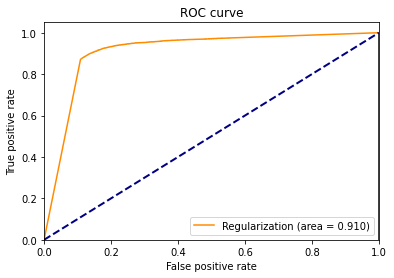

0.9102876781232292

In [2]:
nn.get_roc_curve(net, test_loader, input_size, title="Regularization")

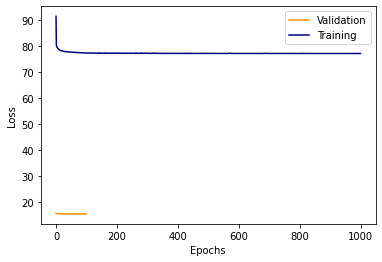

In [3]:
ut.plot_training(hist_val, hist_train)

In [4]:
nn.get_results(net, train_loader, input_size)
nn.get_results(net, test_loader, input_size)

recall
tensor(0.9977)
precision
tensor(0.9973)
f1_score
tensor(0.9975)
Accuracy of the network on test objects: 99 %
99.73403
recall
tensor(0.9252)
precision
tensor(0.8292)
f1_score
tensor(0.8746)
Accuracy of the network on test objects: 82 %
82.922424


(array(82.922424, dtype=float32),
 array(0.92524844, dtype=float32),
 array(0.8746086, dtype=float32))

In [5]:
torch.save(net.state_dict(), 'model.pkl')

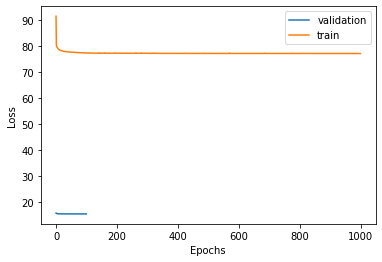

In [6]:
plt.plot(hist_val, label ='validation')
plt.plot(hist_train, label ='train')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.savefig('images/'+str(samples)+'_'+str(epsilon)+'_'+str(n)+"_"+str(hidden_size)+"_Loss_Training.png")
plt.show()

In [7]:
#csv_file = open("size_MLP_noise.csv", "a")
#csv_file.write(str(np.asarray(acc_testing))+","+str(np.asarray(acc_training))+","+str(samples)+","+str(epsilon)+","+str(n)+","+str(hidden_size)+"\n")
#csv_file.close()

In [8]:
outputs, intermediates, intermediates2, labels = ut.get_representations(net, train_loader, device)
outputs_test, intermediates_test, intermediates2_test, labels_test = ut.get_representations(net, test_loader, device)

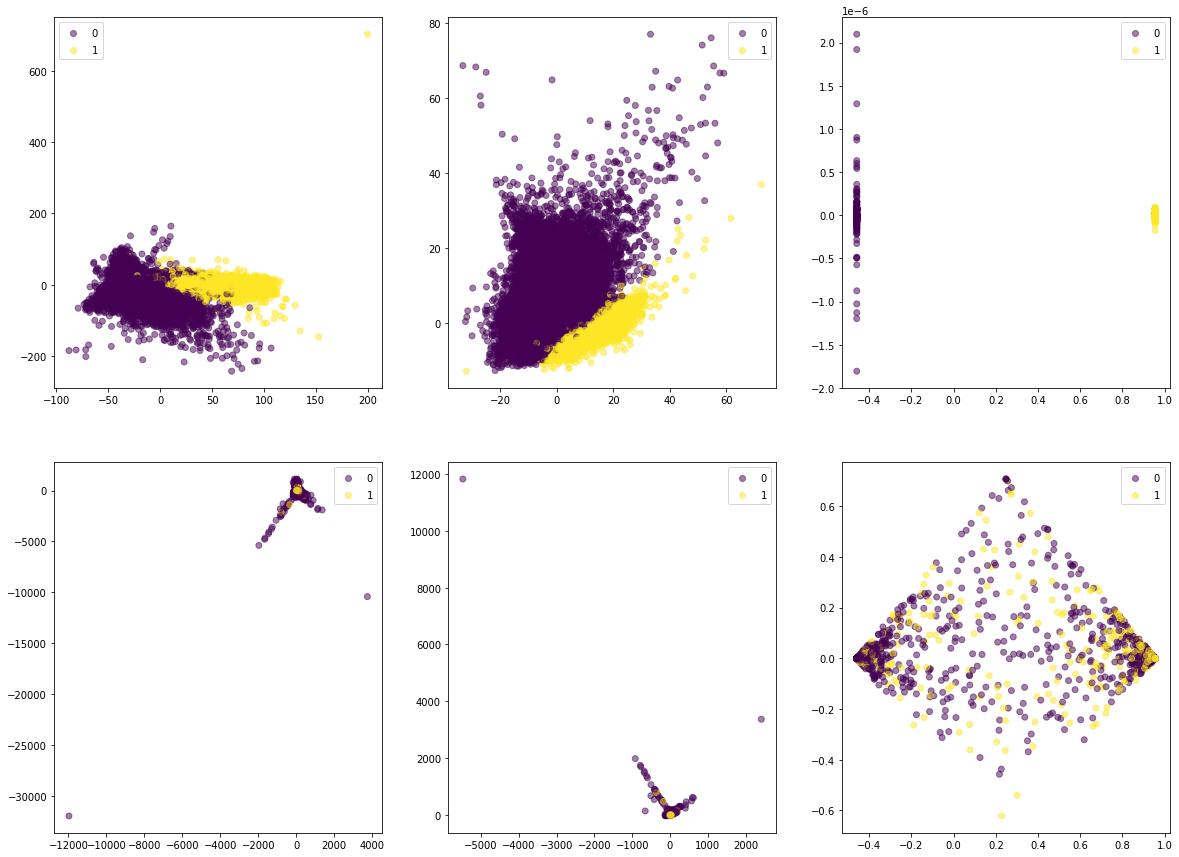

In [9]:
intermediate_pca_data, intermediate_pca_data_test = ut.get_pca(intermediates, data_test=intermediates_test)
fig, axs = plt.subplots(2, 3, figsize=(20,15))
ut.plot_representations(intermediate_pca_data, labels, axs[0, 0])
ut.plot_representations(intermediate_pca_data_test, labels_test, axs[1, 0])
intermediate2_pca_data, intermediate2_pca_data_test = ut.get_pca(intermediates2, data_test=intermediates2_test)
ut.plot_representations(intermediate2_pca_data, labels, axs[0, 1])
ut.plot_representations(intermediate2_pca_data_test, labels_test, axs[1, 1])
output_pca_data, output_pca_data_test = ut.get_pca(outputs, data_test=outputs_test)
ut.plot_representations(output_pca_data, labels, axs[0, 2])
ut.plot_representations(output_pca_data_test, labels_test, axs[1, 2])

first
first ..
first ...


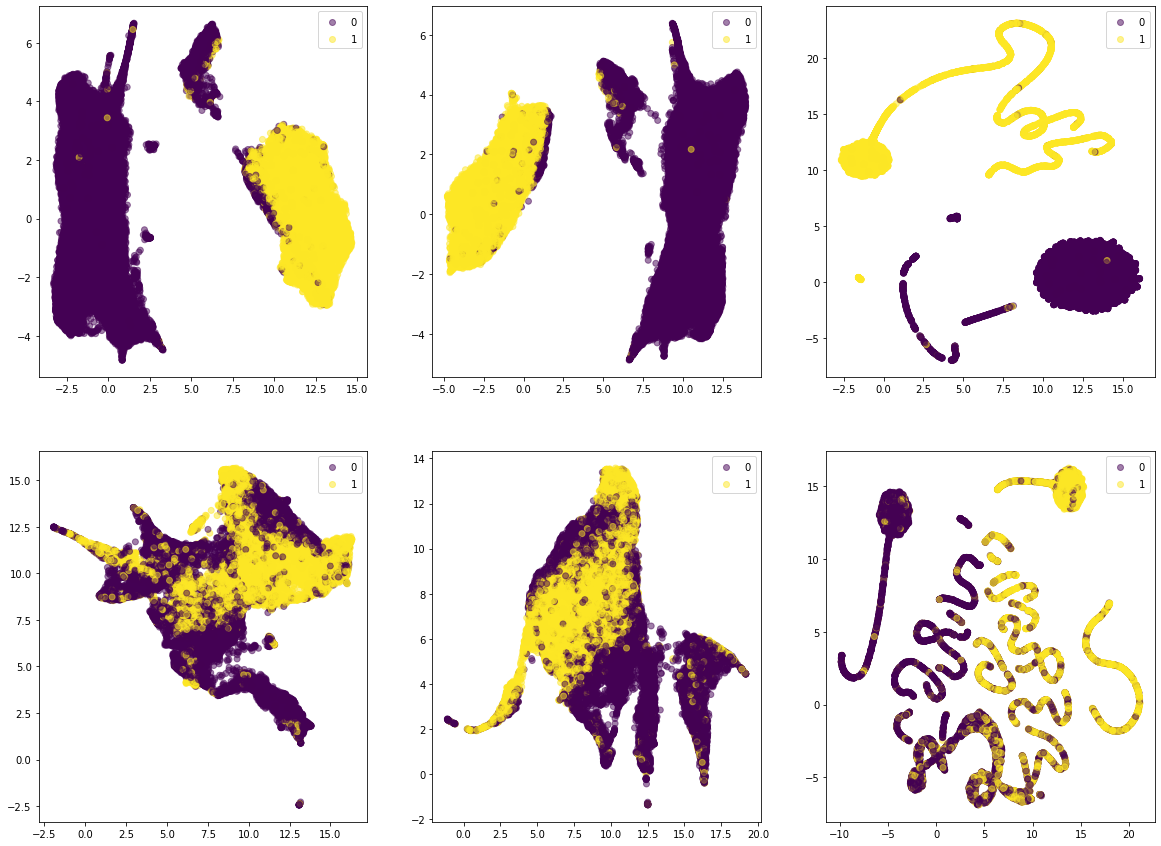

In [10]:
import umap

fig, axs = plt.subplots(2, 3, figsize=(20,15))
print('first')
reducer = umap.UMAP()
print('first ..')
mapper_train = reducer.fit_transform(intermediates.numpy())
print('first ...')
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 0])
ut.plot_representations(mapper_test, labels_test, axs[1, 0])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(intermediates2.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates2_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 1])
ut.plot_representations(mapper_test, labels_test, axs[1, 1])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(outputs.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(outputs_test.numpy())

ut.plot_representations(mapper_train, labels, axs[0, 2])
ut.plot_representations(mapper_test, labels_test, axs[1, 2])

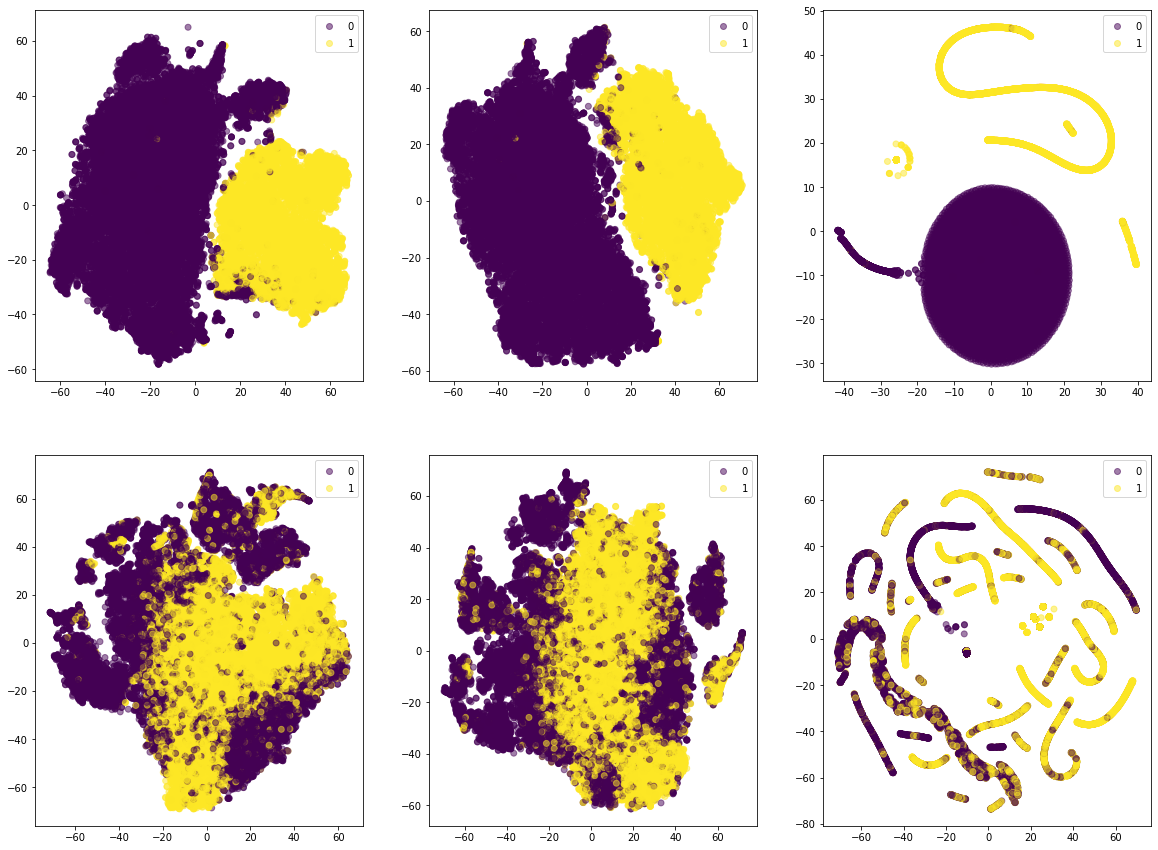

In [11]:
N_CURVES = 25000

fig, axs = plt.subplots(2, 3, figsize=(20,15))
intermediate_tsne_data, intermediate_tsne_data_test = ut.get_tsne(intermediates, data_test= intermediates_test, n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data, labels, axs[0, 0],  n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data_test, labels_test, axs[1, 0], n_curves = N_CURVES)

intermediate2_tsne_data, intermediate2_tsne_data_test = ut.get_tsne(intermediates2, data_test=intermediates2_test, n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data, labels, axs[0, 1], n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data_test, labels_test, axs[1, 1], n_curves = N_CURVES)

output_tsne_data, output2_tsne_data_test = ut.get_tsne(outputs, data_test=outputs_test, n_curves = N_CURVES)
ut.plot_representations(output_tsne_data, labels, axs[0, 2], n_curves = N_CURVES)
ut.plot_representations(output2_tsne_data_test, labels_test, axs[1, 2], n_curves = N_CURVES)

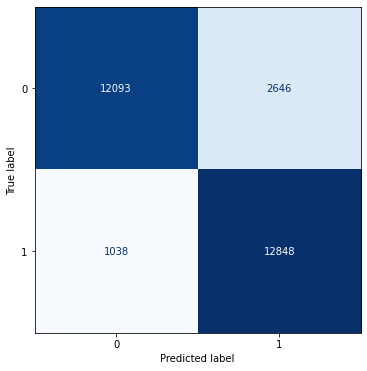

In [12]:
#fig, ax = plt.subplots(1, 1, figsize=(15,15))
#curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
#pred_labels = probs_train.argmax(1, keepdim = True)
#ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = probs_test.argmax(1, keepdim = True)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)

In [13]:
curves, labels, probs_train_sample = ut.get_predictions(net, train_loader, device)

In [14]:
#N_WEIGHTS = 25
#weights = net.fc2.weight.data
#plot_weights(weights, N_WEIGHTS)

In [15]:
weights1 = net.fc1.weight.data
w1 = weights1.cpu().numpy().reshape(-1,1)
weights2 = net.fc2.weight.data
w2 = weights2.cpu().numpy().reshape(-1,1)
weights3 = net.fc3.weight.data
w3 = weights3.cpu().numpy().reshape(-1,1)

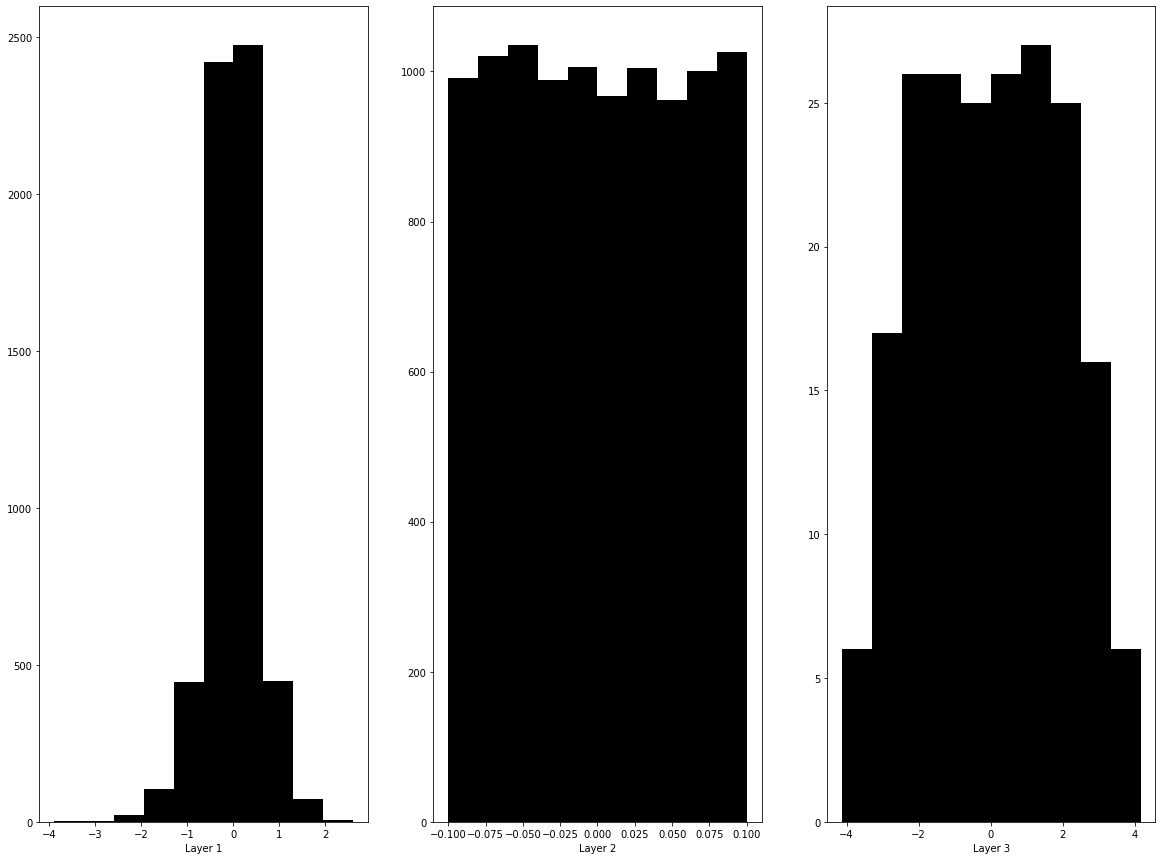

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,15))
ax1.hist(w1, color='black')
ax1.set_xlabel('Layer 1')
ax2.hist(w2, color='black')
ax2.set_xlabel('Layer 2')
ax3.hist(w3, color='black')
ax3.set_xlabel('Layer 3')
plt.show()

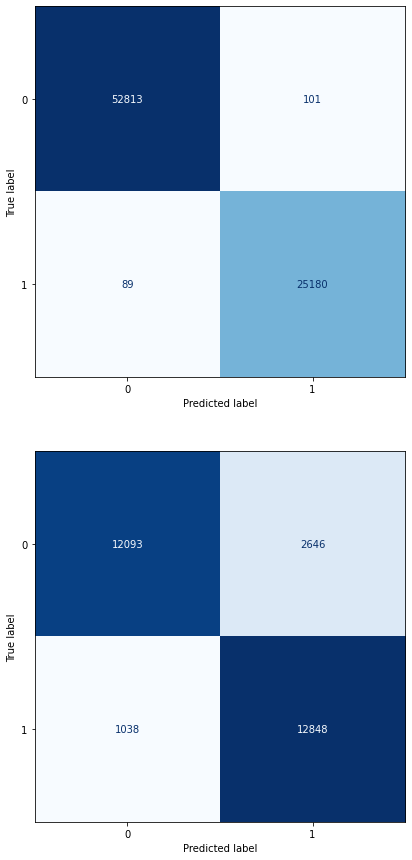

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
pred_labels = torch.argmax(probs_train, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax1)
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = torch.argmax(probs_test, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax2)